In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Data Sets For Practice\weatherAUS.CSV')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# EDA

In [3]:
df.shape

(145460, 23)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.isna().sum()/len(df)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

**Percentage of null values are high in som variables.**

**All these variable are important in analysis and model building.**

**So, I decided to impute all the variables rather than dropping them after checking statitical summary and correlation between variables.**

In [7]:
#dropping date column because it is irrelavant feature in model building

df.drop('Date',axis=1,inplace=True)

In [8]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df.duplicated().sum()

215

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
#check the statistical summary

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144193.000000,142156.000000,82669.000000,75624.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221210,2.361632,5.468240,7.611123,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119137,8.479242,4.193729,3.785479,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


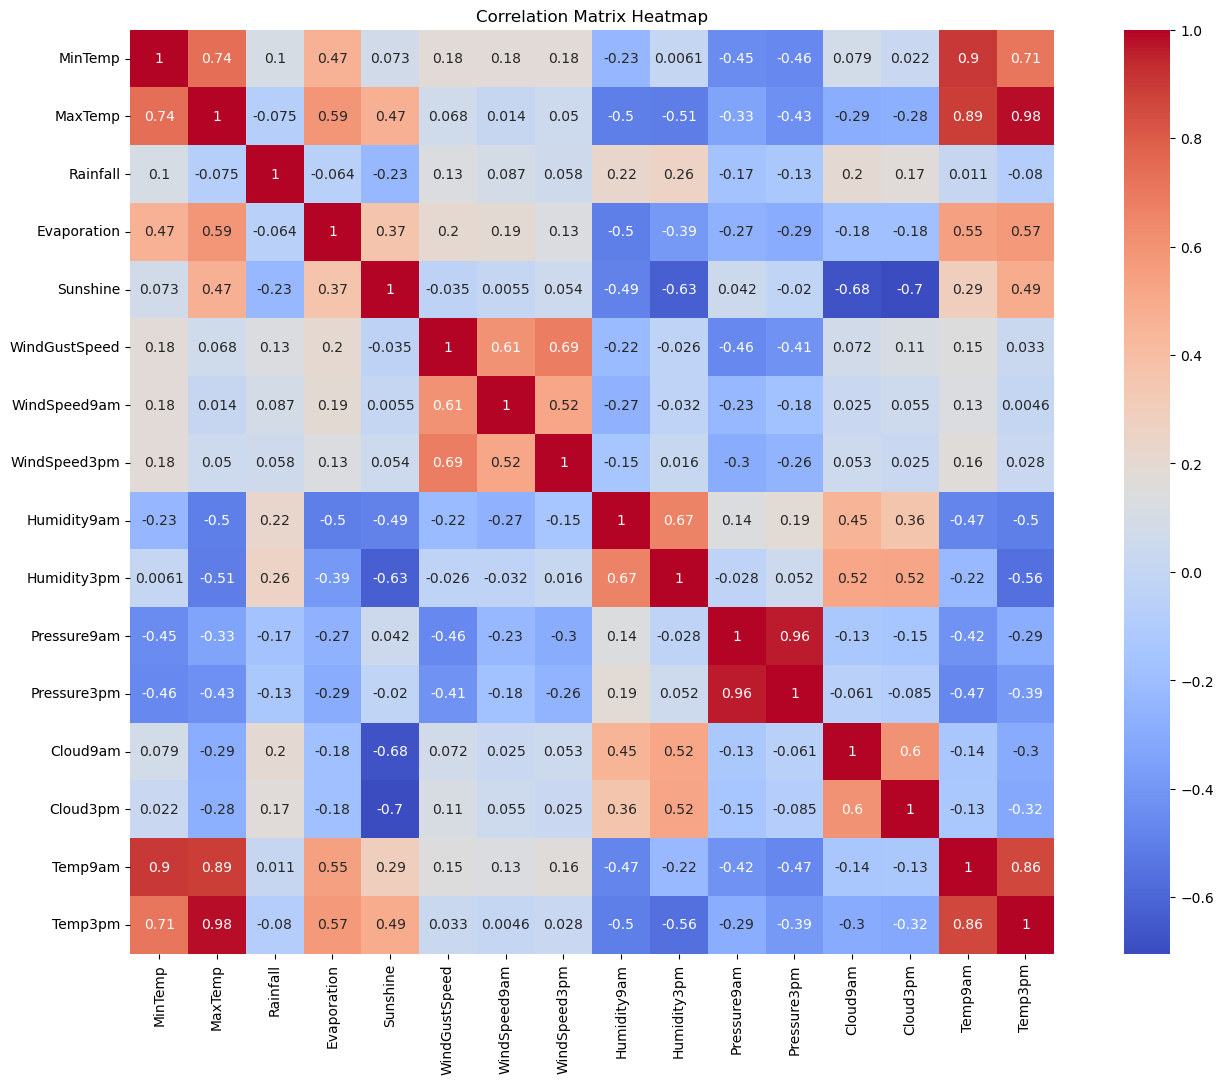

In [13]:
#checking correlation between variables

corr_matrix = df.corr()
plt.figure(figsize=(18,12)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

**"MinTemp" & "Temp9am" are highly positively correlated.**

**"MaxTemp" & "Temp9am" are highly positively correlated.**

**"MaxTemp" & "Temp3am" are highly positively correlated.**

**"Temp9am" & "Temp3am" are highly positively correlated.**

In [14]:
#dropping null values

df.dropna(subset=['RainTomorrow'], inplace=True)

**Drop the null values of 'RainTomorrow' because it is target variable and impute the values of this variable is not a correct approach**

In [15]:
df.shape

(142148, 22)

Approx 2.27% data is lost.

In [16]:
df.isna().sum()/len(df)*100

Location          0.000000
MinTemp           0.416467
MaxTemp           0.199088
Rainfall          0.986999
Evaporation      42.770915
Sunshine         47.676365
WindGustDir       6.531924
WindGustSpeed     6.489715
WindDir9am        7.012410
WindDir3pm        2.626136
WindSpeed9am      0.916650
WindSpeed3pm      1.818527
Humidity9am       1.216338
Humidity3pm       2.507949
Pressure9am       9.827082
Pressure3pm       9.803866
Cloud9am         37.715620
Cloud3pm         40.133523
Temp9am           0.604300
Temp3pm           1.886062
RainToday         0.986999
RainTomorrow      0.000000
dtype: float64

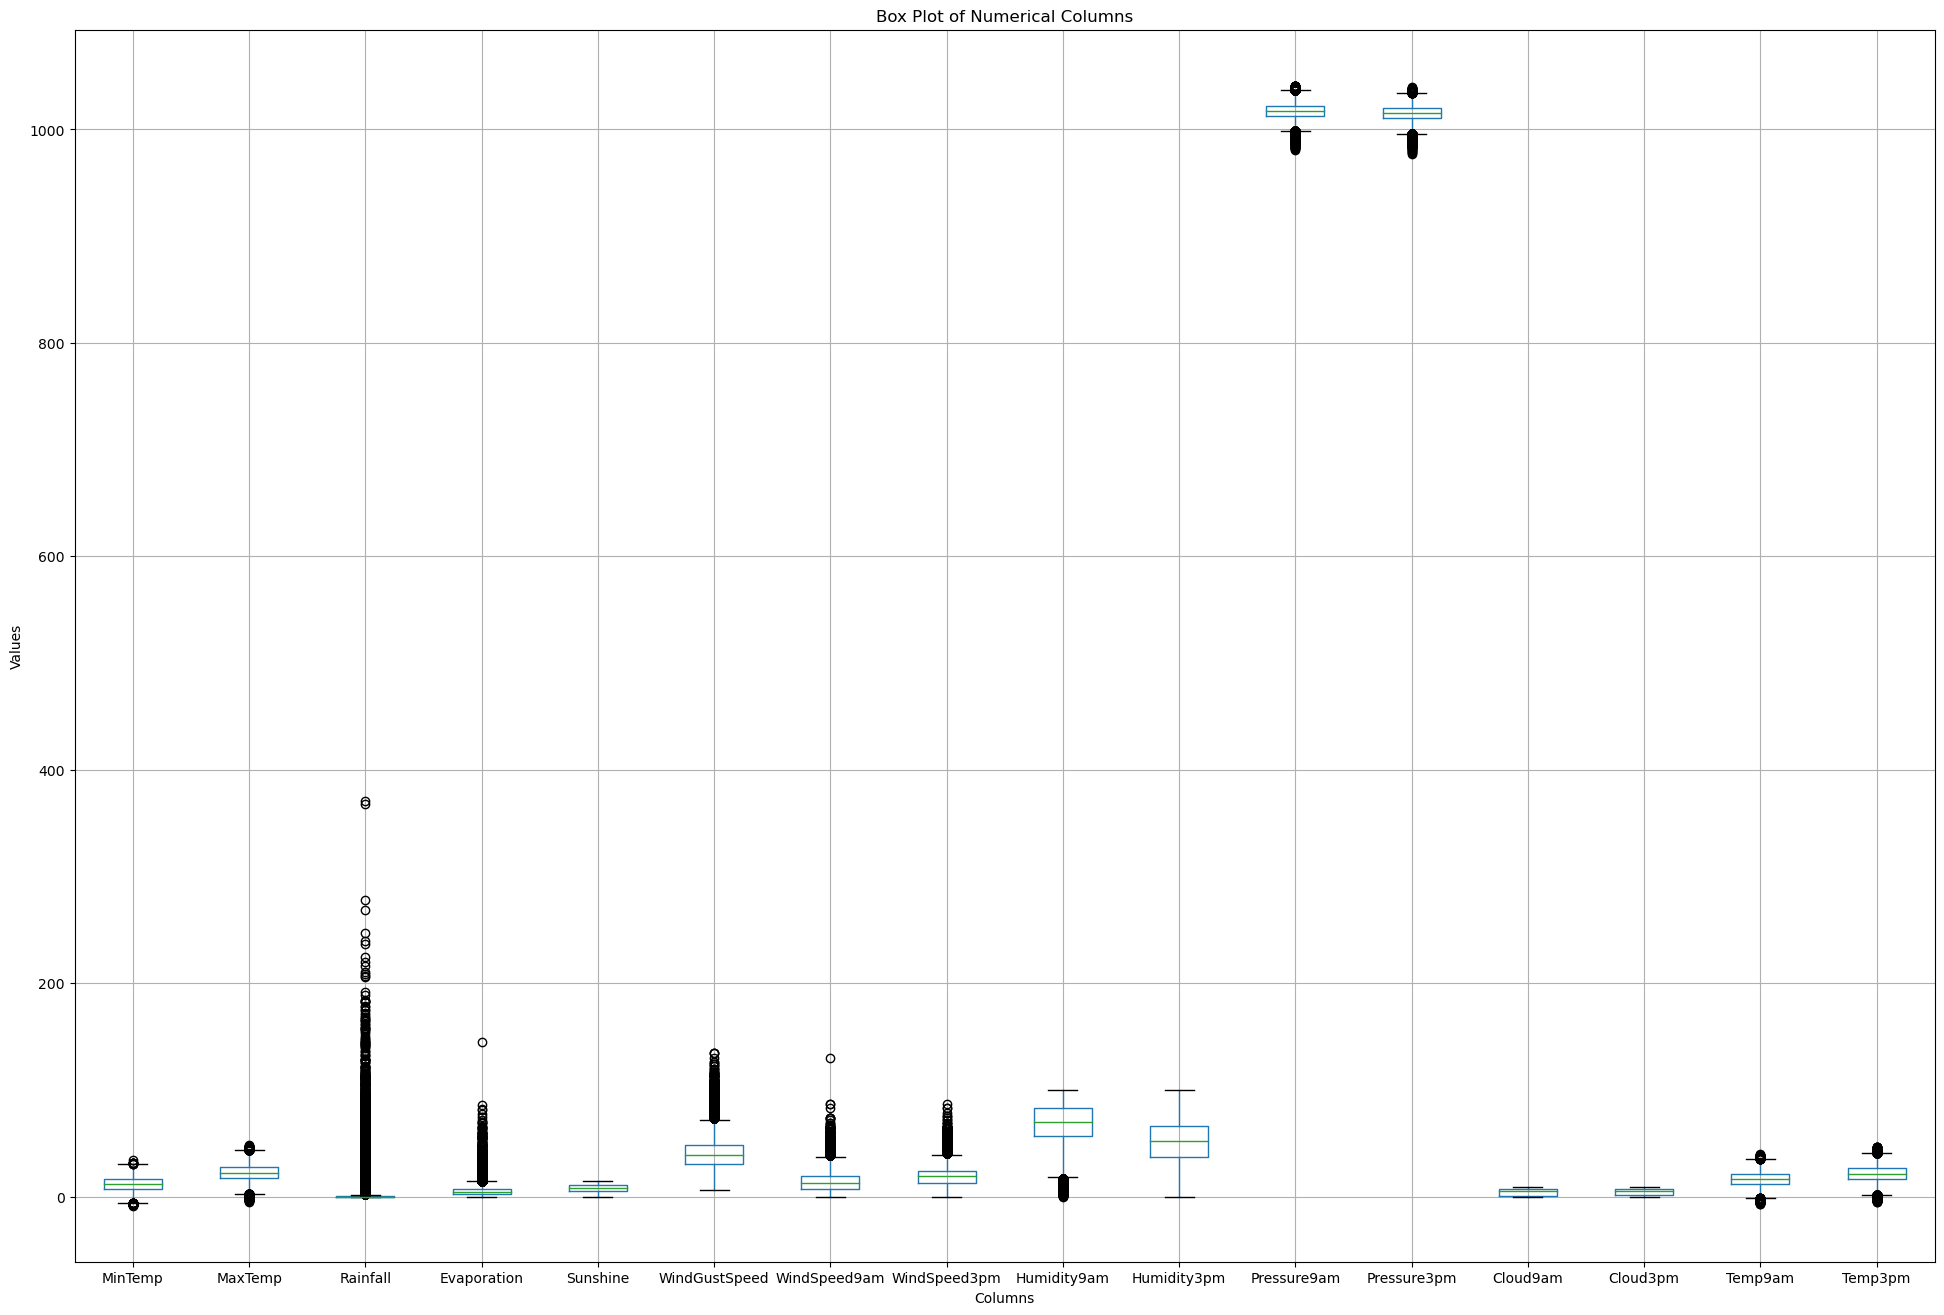

In [17]:
#checking the outliers of all numerical columns

plt.figure(figsize=(24, 16)) #(width,height)
df.boxplot()
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

**'Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm' doesn't contains outliers. So, mean imputation is correct approach for these variables.**

**'MinTemp', 'MaxTemp, 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm' contains outliers. So, median imputation is correct option for these variables.**

In [18]:
# imputing variables with mean 

variables_to_impute = ['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm']

for variable in variables_to_impute:
    mean_value = df[variable].mean()
    df[variable].fillna(mean_value, inplace=True)

In [19]:
# imputing variables with median 

variables_to_impute = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am',
    'Pressure3pm', 'Temp9am', 'Temp3pm'
]

for variable in variables_to_impute:
    median_value = df[variable].median()
    df[variable].fillna(median_value, inplace=True)

In [20]:
# imputing variables with mode

variables_to_impute = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for variable in variables_to_impute:
    mode_value = df[variable].mode().values[0]
    df[variable].fillna(mode_value, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142148 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142148 non-null  object 
 1   MinTemp        142148 non-null  float64
 2   MaxTemp        142148 non-null  float64
 3   Rainfall       142148 non-null  float64
 4   Evaporation    142148 non-null  float64
 5   Sunshine       142148 non-null  float64
 6   WindGustDir    142148 non-null  object 
 7   WindGustSpeed  142148 non-null  float64
 8   WindDir9am     142148 non-null  object 
 9   WindDir3pm     142148 non-null  object 
 10  WindSpeed9am   142148 non-null  float64
 11  WindSpeed3pm   142148 non-null  float64
 12  Humidity9am    142148 non-null  float64
 13  Humidity3pm    142148 non-null  float64
 14  Pressure9am    142148 non-null  float64
 15  Pressure3pm    142148 non-null  float64
 16  Cloud9am       142148 non-null  float64
 17  Cloud3pm       142148 non-nul

**All the null values are imputed successfully.**

**All variables has correct data types except Date variable.**

In [22]:
#Check the unique values of all variables to identify any suspicious values or typo's

for column in df.columns:
    unique_values = df[column].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()   

Column: Location
Unique Values:
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

Column: MinTemp
Unique Values:
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  9.8 14.1
 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3  9.6
 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6 19.3
 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5 28.3
 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8  7.6


**There is no suspicious value or typo's in any of the variables.**


**Data is cleaned now. So, I recheck it.**

In [23]:
df.shape

(142148, 22)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142148 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142148 non-null  object 
 1   MinTemp        142148 non-null  float64
 2   MaxTemp        142148 non-null  float64
 3   Rainfall       142148 non-null  float64
 4   Evaporation    142148 non-null  float64
 5   Sunshine       142148 non-null  float64
 6   WindGustDir    142148 non-null  object 
 7   WindGustSpeed  142148 non-null  float64
 8   WindDir9am     142148 non-null  object 
 9   WindDir3pm     142148 non-null  object 
 10  WindSpeed9am   142148 non-null  float64
 11  WindSpeed3pm   142148 non-null  float64
 12  Humidity9am    142148 non-null  float64
 13  Humidity3pm    142148 non-null  float64
 14  Pressure9am    142148 non-null  float64
 15  Pressure3pm    142148 non-null  float64
 16  Cloud9am       142148 non-null  float64
 17  Cloud3pm       142148 non-nul

In [25]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [26]:
df.duplicated().sum()

3

**These three duplicate values are come due to imputing data**

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

0

In [29]:
### Data is cleaned now. So, I make a copy of it.

df_cleaned = df.copy()

# Identifying and Treating Outliers: IQR Method

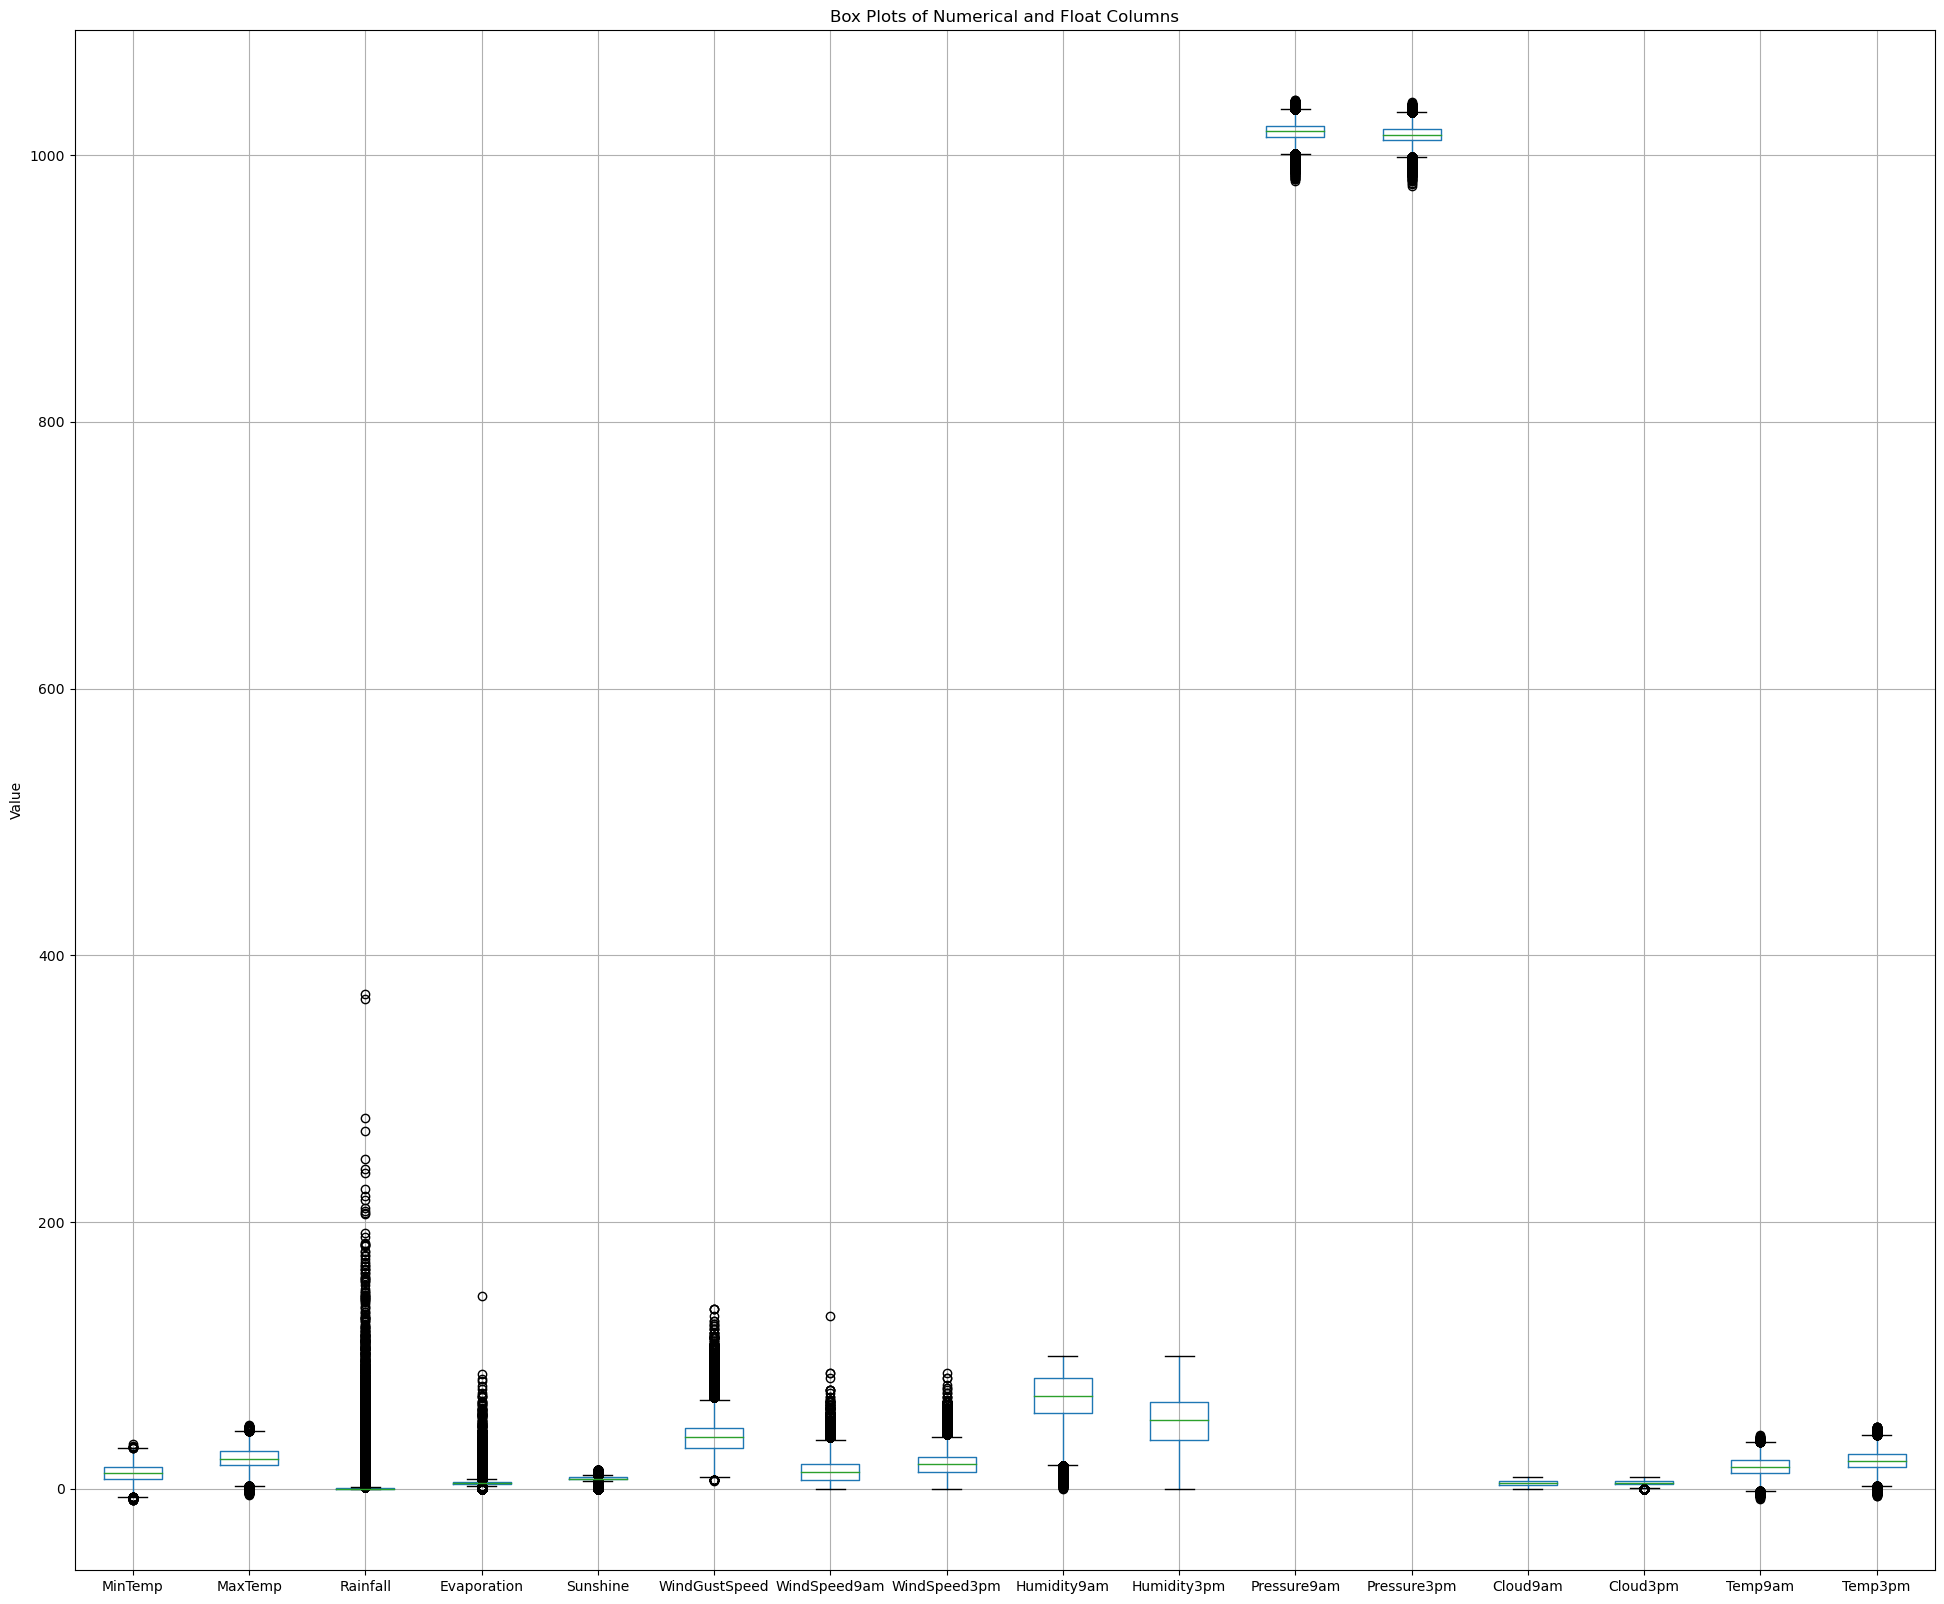

In [30]:
numerical_columns = df.select_dtypes(include=['number', 'float']).columns

plt.figure(figsize=(24,20)) #(width,height)
df[numerical_columns].boxplot()
plt.title('Box Plots of Numerical and Float Columns')
plt.ylabel('Value')
plt.show()

**'MinTemp', 'MaxTemp, 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Cloud3pm' 'Temp9am', 'Temp3pm' contains outliers.**

**There is a large number of outliers present in the data. If I use the IQR method, a significant amount of data would be lost. So, I have decided to use the Z-score method.**

# Identifying and Treating Outliers: Z-Score Method

In [31]:
#create a variable for all interger and float variables

numerical_columns = df.select_dtypes(include=['number', 'float']).columns

In [32]:
#calculate Z-score of all values of all variables and a new dataframe of it

z_scores = pd.DataFrame()
for column in numerical_columns:
    z_scores[column] = np.abs((df[column] - df[column].mean()) / df[column].std())

z_scores.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.190042,0.045760,0.204981,0.120323,9.874100e-13,0.310402,0.678540,0.613980,0.113128,1.435687,1.474415,1.219897,1.563689e+00,1.699513e-12,0.013251,0.018018
1,0.748923,0.263631,0.276174,0.120323,9.874100e-13,0.310402,1.128739,0.384705,1.312751,1.289599,1.044620,1.115153,3.746116e-13,1.699513e-12,0.033093,0.381792
2,0.111795,0.348010,0.276174,0.120323,9.874100e-13,0.462576,0.565585,0.843254,1.629613,1.046119,1.489235,0.980482,3.746116e-13,1.189117e+00,0.620120,0.221732
3,0.467233,0.671464,0.276174,0.120323,9.874100e-13,1.211339,0.338054,1.105581,1.259940,1.727864,0.007184,0.366979,3.746116e-13,1.699513e-12,0.172126,0.701914
4,0.831668,1.276183,0.157518,0.120323,9.874100e-13,0.082141,0.789874,0.155430,0.694041,0.900031,1.014979,1.384496,1.124797e+00,1.661153e+00,0.125782,1.167545


In [33]:
#Setting a threshold of 3 means that any value outside the range of -3 to +3 standard deviations is considered as outlier

threshold = 3
outlier_rows = z_scores[(z_scores > threshold).any(axis=1)]
outlier_rows

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
8,0.388986,1.219930,0.276174,0.120323,9.874100e-13,3.049536,0.789874,1.072529,1.418371,2.068737,1.296569,1.743619,3.746116e-13,1.699513e-12,0.203022,1.240300
12,0.581278,0.650479,1.574856,0.120323,9.874100e-13,1.603882,1.582179,1.072529,0.377179,2.021735,3.460363,3.329748,1.563689e+00,1.661153e+00,0.063989,0.855040
52,1.911478,1.515257,0.204981,0.120323,9.874100e-13,4.419103,1.356270,3.365277,0.467786,0.607854,1.830107,2.611501,1.918789e-01,1.664162e+00,1.407972,1.662278
62,2.474857,2.795011,0.276174,0.120323,9.874100e-13,3.277798,0.113765,1.105581,2.210526,2.068737,0.763030,0.980482,3.746116e-13,1.699513e-12,2.381201,2.942763
68,1.582841,3.034085,0.276174,0.120323,9.874100e-13,1.451708,0.563964,1.645716,1.735233,1.971344,1.400312,1.713692,3.746116e-13,1.699513e-12,1.948655,3.161028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145251,0.769071,2.569999,0.276174,0.120323,9.874100e-13,1.756056,0.789874,0.417757,3.161112,2.214825,0.985338,1.249824,3.746116e-13,2.390269e-01,2.149480,2.549887
145252,1.113358,2.485620,0.276174,0.120323,9.874100e-13,0.222207,0.563964,1.105581,3.055491,2.117433,1.400312,1.608948,3.746116e-13,1.661153e+00,2.087688,2.593540
145278,1.551542,0.587085,9.667180,0.120323,9.874100e-13,2.440840,1.921044,2.792090,1.644627,2.362607,3.415902,3.898360,1.563689e+00,1.661153e+00,0.805497,0.367241
145279,1.551542,1.768395,7.294064,0.120323,9.874100e-13,0.234315,0.339675,1.416441,0.429989,0.510462,2.941645,3.000551,1.918789e-01,1.189117e+00,1.392524,1.720482


In [34]:
#dropping outliers

df = df.drop(outlier_rows.index)

In [35]:
df.shape

(133447, 22)

**Approx 6.51% is lost in outliers removal. Approx 9-10% data is lost till now after removing duplicates and outliers.**

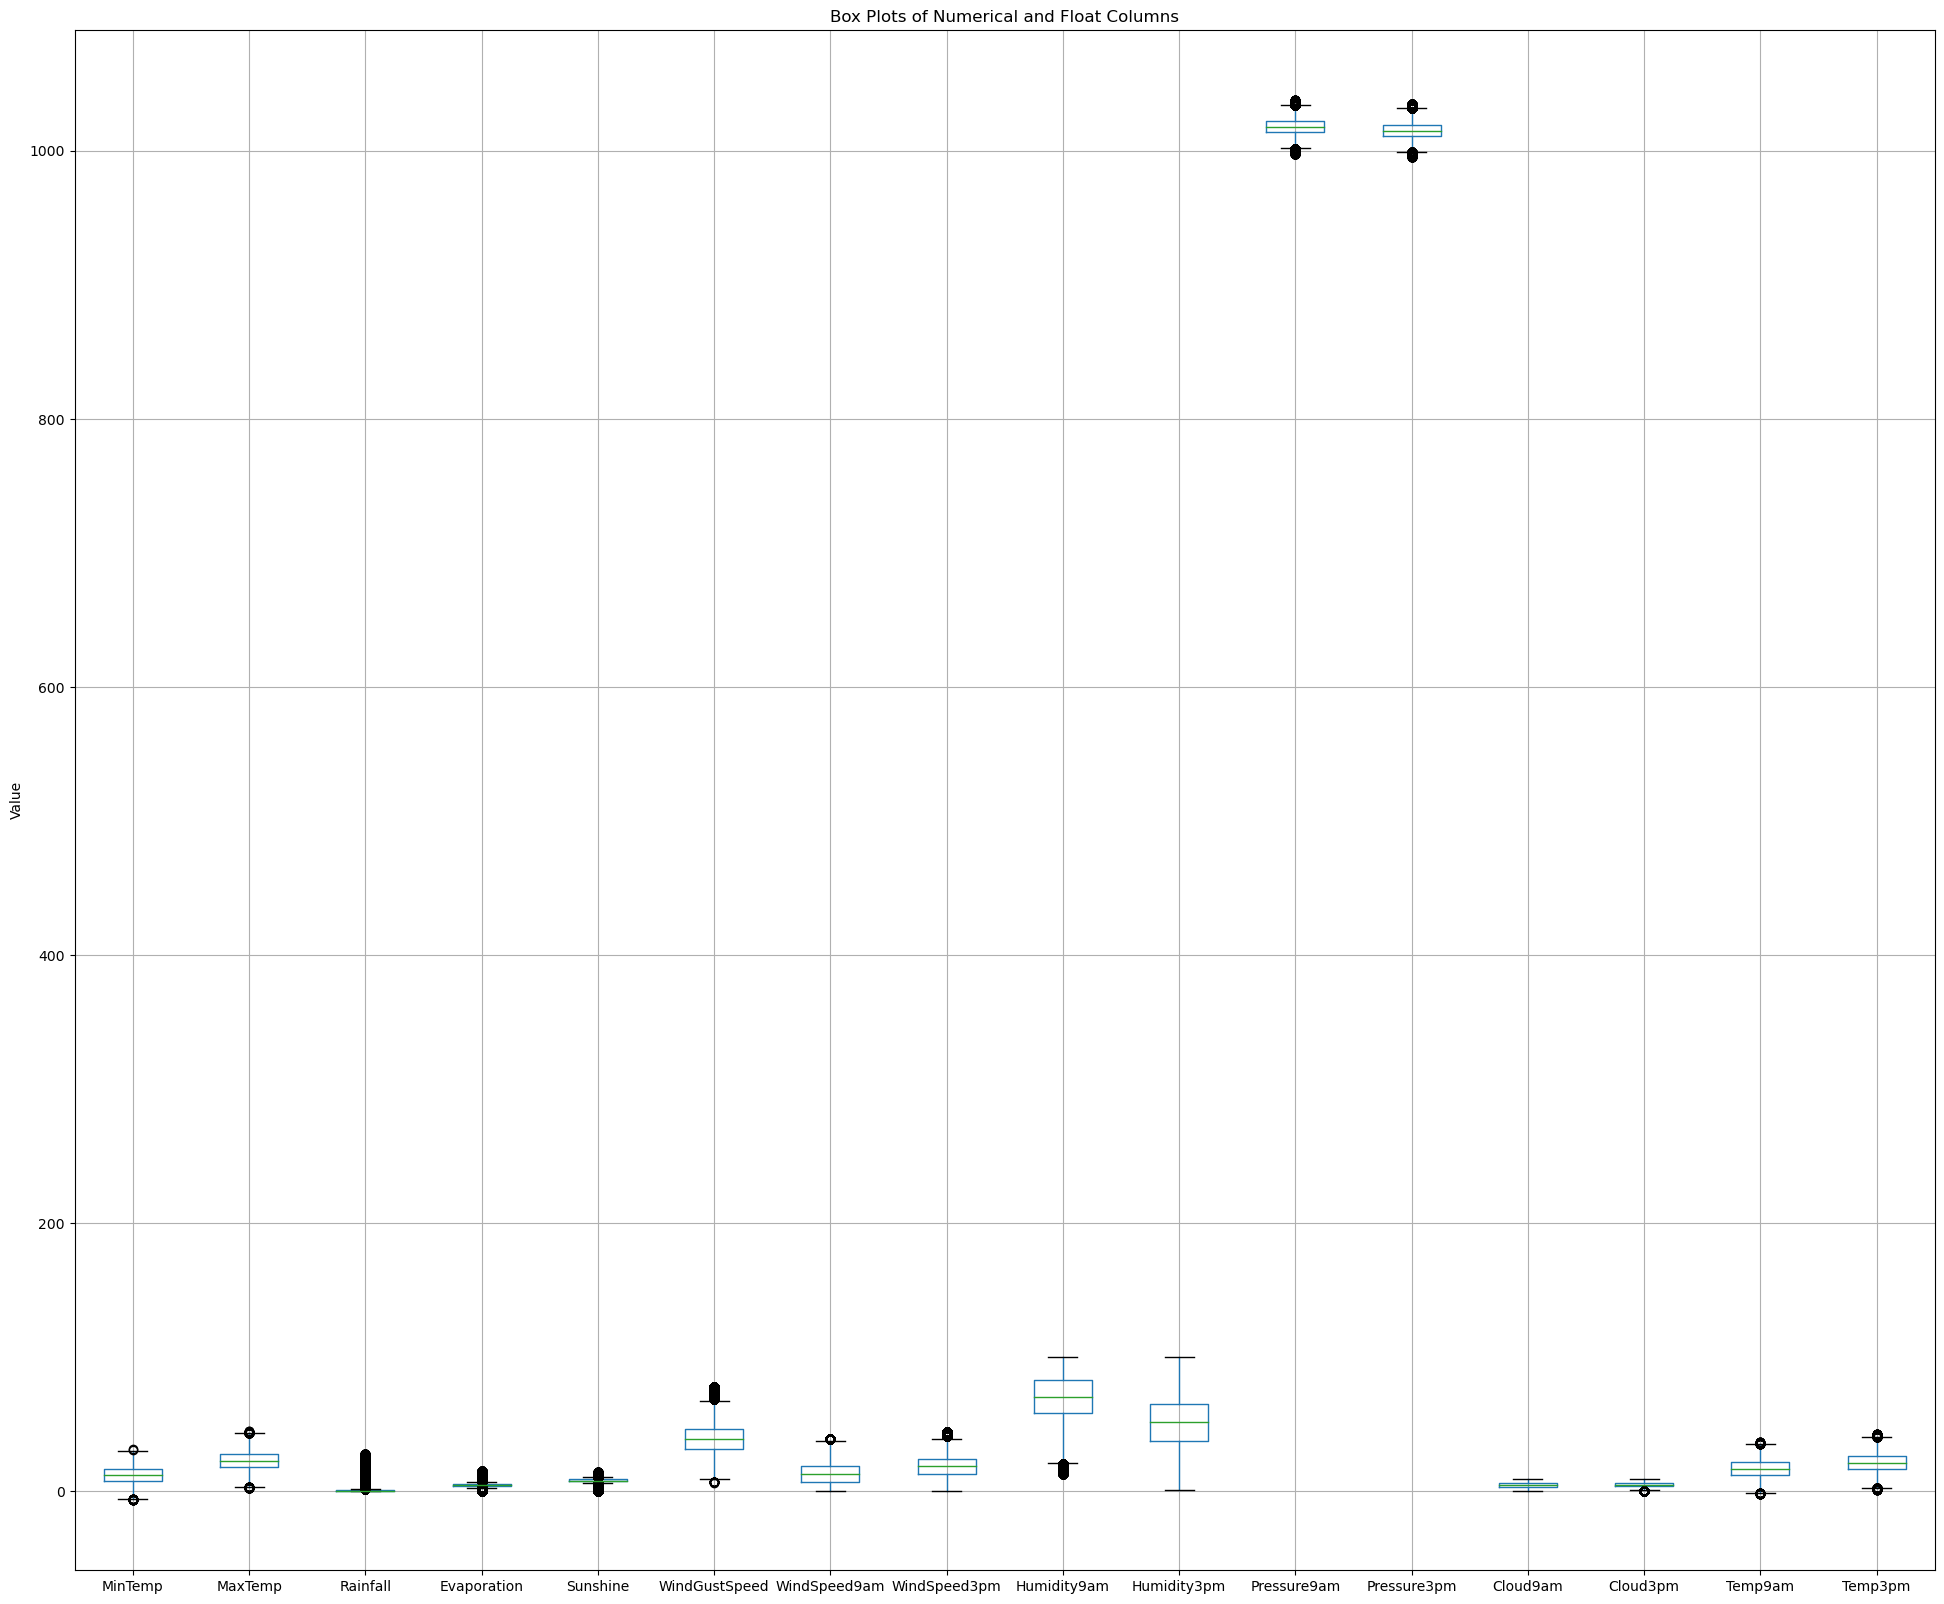

In [36]:
plt.figure(figsize=(24,20)) #(width,height)
df[numerical_columns].boxplot()
plt.title('Box Plots of Numerical and Float Columns')
plt.ylabel('Value')
plt.show()

**All the outliers are removed successfully.**

# Feature Encoding

In [37]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [38]:
variables = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for variable in variables:
    unique_values = df[variable].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: Temp3pm
Unique Values:
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']

Column: Temp3pm
Unique Values:
['W' 'WNW' 'WSW' 'NE' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NNW' 'NW' 'SE' 'ESE'
 'E' 'SSW']

Column: Temp3pm
Unique Values:
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']

Column: Temp3pm
Unique Values:
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'SSW' 'SW' 'NNW' 'SE' 'N' 'S'
 'NNE' 'NE']

Column: Temp3pm
Unique Values:

**I decide to apply target mean encoding on 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm' because these are nomial variables with multiple categories.**

**I decide to apply df.replace method on 'RainToday' and 'RainTomorrow' because these are binomial variables.**

In [39]:
# Replace 'yes' with 1 and 'no' with 0 

df['RainToday'] = df['RainToday'].replace('Yes', 1).replace('No', 0)
df['RainTomorrow'] = df['RainTomorrow'].replace('Yes', 1).replace('No', 0)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,7.624853,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,4.8,7.624853,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,4.8,7.624853,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,4.8,7.624853,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,4.8,7.624853,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


In [40]:
#Target Mean Encoding

target_variable = 'RainTomorrow'

variables_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

for variable in variables_to_encode:
    target_means = df.groupby(variable)[target_variable].mean()
    df[variable] = df[variable].map(target_means)

In [41]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.196732,13.4,22.9,0.6,4.8,7.624853,0.249593,44.0,0.244560,0.262861,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0
1,0.196732,7.4,25.1,0.0,4.8,7.624853,0.264066,44.0,0.291810,0.210229,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0
2,0.196732,12.9,25.7,0.0,4.8,7.624853,0.216824,46.0,0.244560,0.210229,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0
3,0.196732,9.2,28.0,0.0,4.8,7.624853,0.180551,24.0,0.147763,0.162642,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,0
4,0.196732,17.5,32.3,1.0,4.8,7.624853,0.249593,41.0,0.169510,0.264561,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0


**Target Encoding is successfully done.**

In [42]:
#check data types of all variables to confrim that all variables are in 'int' or 'float' 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133447 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       133447 non-null  float64
 1   MinTemp        133447 non-null  float64
 2   MaxTemp        133447 non-null  float64
 3   Rainfall       133447 non-null  float64
 4   Evaporation    133447 non-null  float64
 5   Sunshine       133447 non-null  float64
 6   WindGustDir    133447 non-null  float64
 7   WindGustSpeed  133447 non-null  float64
 8   WindDir9am     133447 non-null  float64
 9   WindDir3pm     133447 non-null  float64
 10  WindSpeed9am   133447 non-null  float64
 11  WindSpeed3pm   133447 non-null  float64
 12  Humidity9am    133447 non-null  float64
 13  Humidity3pm    133447 non-null  float64
 14  Pressure9am    133447 non-null  float64
 15  Pressure3pm    133447 non-null  float64
 16  Cloud9am       133447 non-null  float64
 17  Cloud3pm       133447 non-nul

**Data types of all variables are fine.**

# Checking Distribution of data

In [43]:
df.shape

(133447, 22)

In [44]:
# Select appropriate bin size using sturges_rule

import math

def sturges_rule(num_data_points):
    k = 1 + math.log2(num_data_points)
    return int(k)

# Example usage
num_data_points = 133447
bins = sturges_rule(num_data_points)
print("Number of bins according to Sturges' Rule:", bins)

Number of bins according to Sturges' Rule: 18


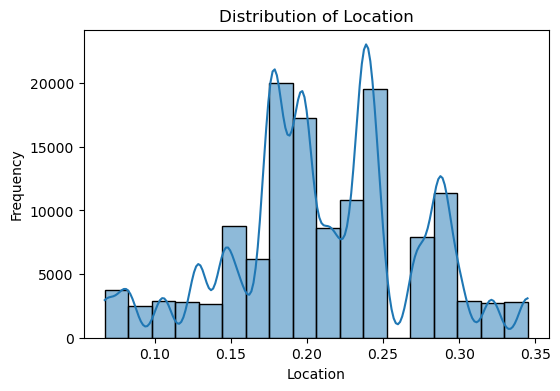

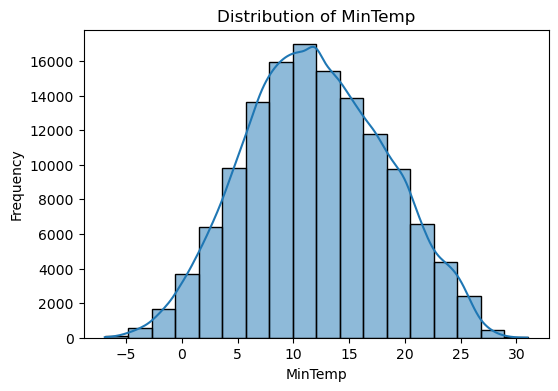

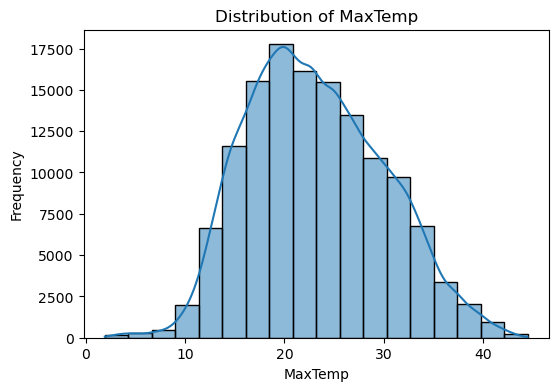

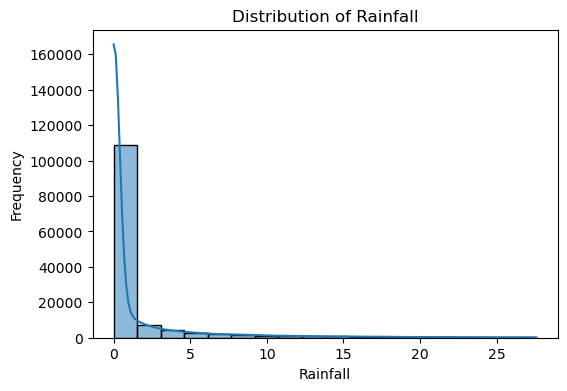

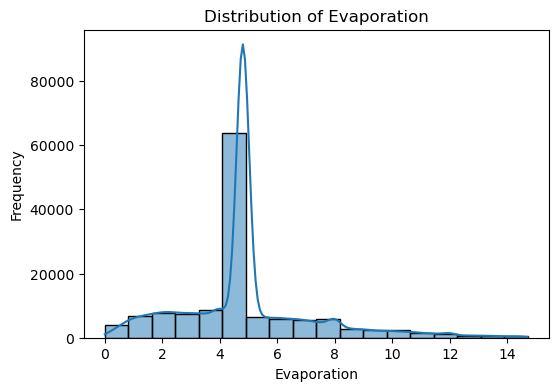

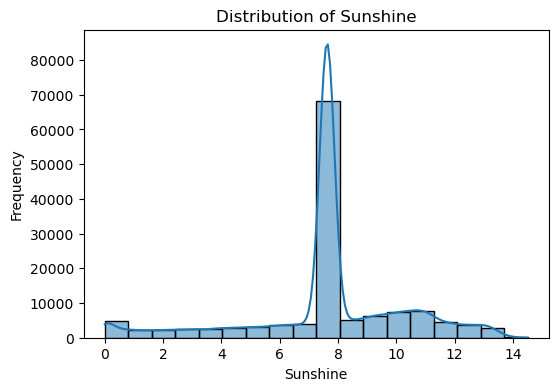

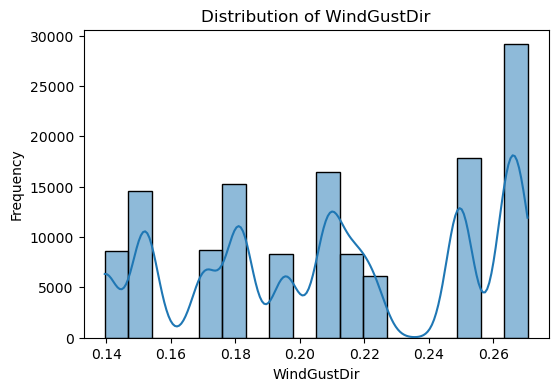

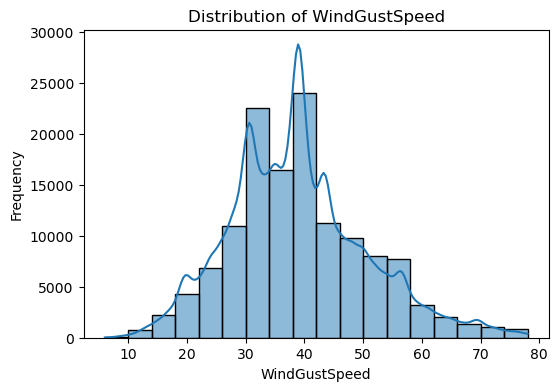

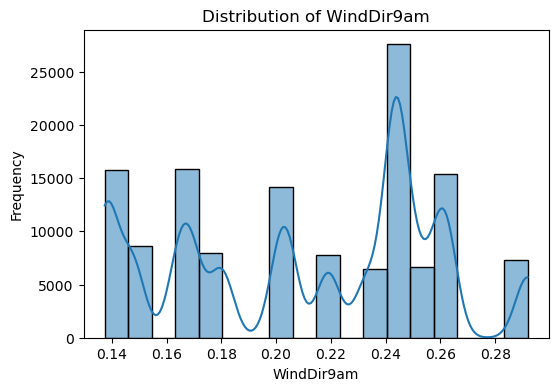

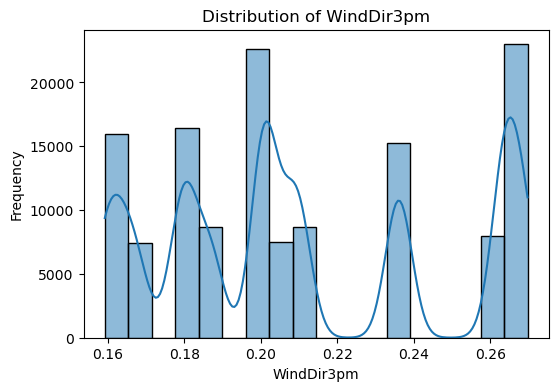

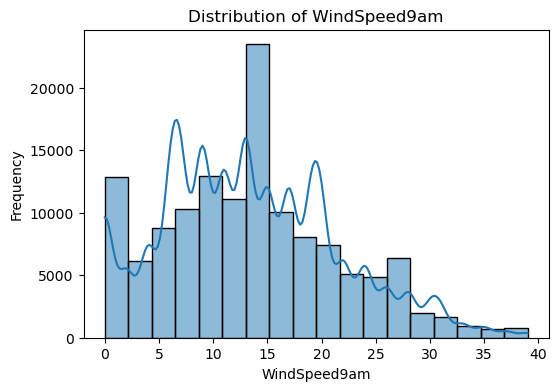

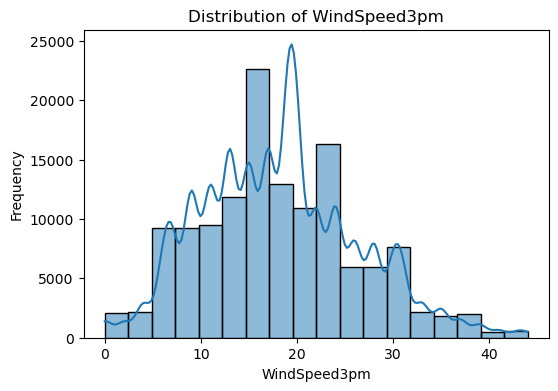

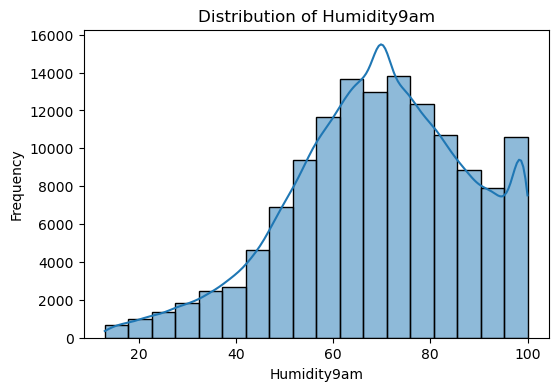

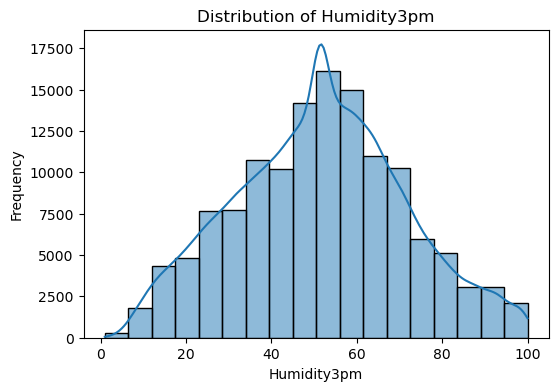

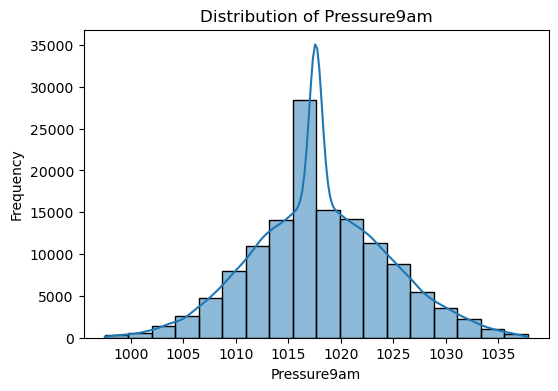

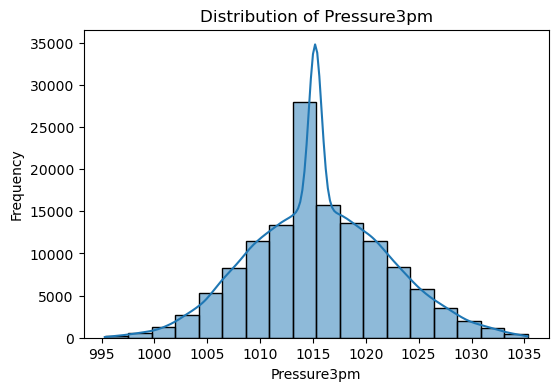

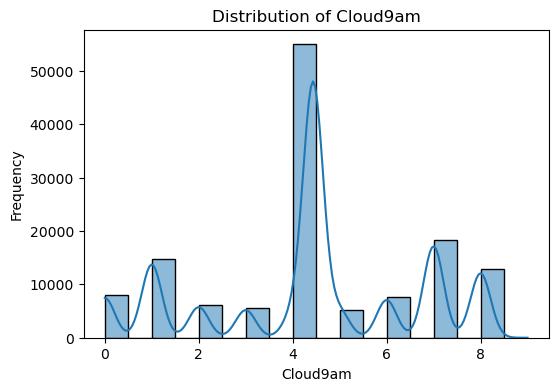

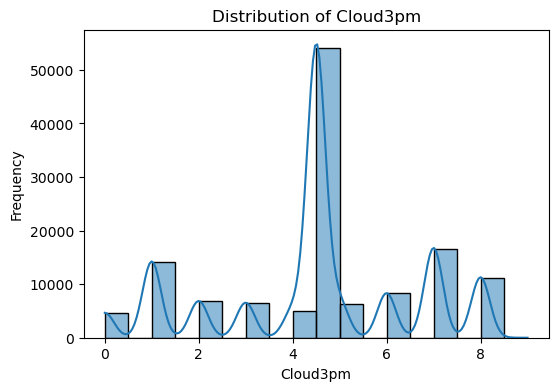

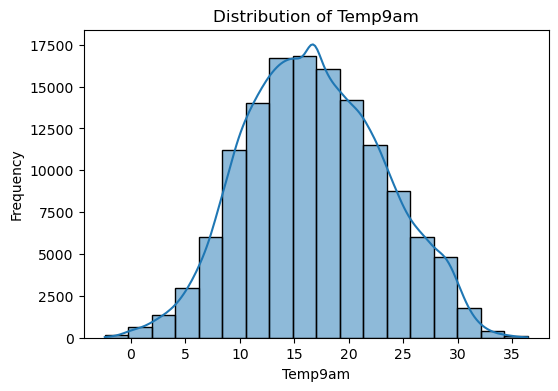

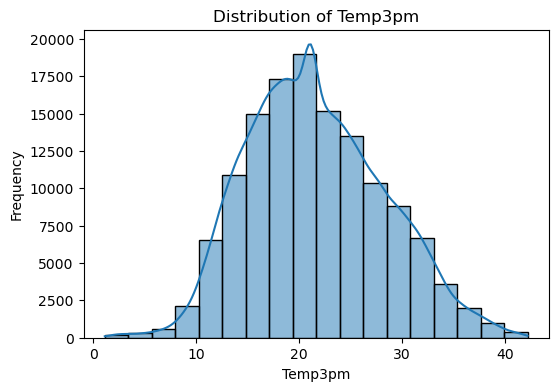

In [45]:
# check distribution of all continuous variables
continuous_vars = df.select_dtypes(include=['float64', 'int64']).columns

# Exclude binary variables from the list
binary_vars = [var for var in continuous_vars if df[var].nunique() == 2]

# Exclude binary variables from the continuous variables
continuous_vars = [var for var in continuous_vars if var not in binary_vars]

# Plot the distribution of each continuous variable
for var in continuous_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=var, bins=18, kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var}')
    plt.show()

In [46]:
# check skewness of all continuous variables
df[continuous_vars].skew()

Location        -0.143479
MinTemp          0.053608
MaxTemp          0.251936
Rainfall         3.700833
Evaporation      0.998940
Sunshine        -0.703541
WindGustDir     -0.097599
WindGustSpeed    0.505791
WindDir9am      -0.187412
WindDir3pm       0.328305
WindSpeed9am     0.454577
WindSpeed3pm     0.372633
Humidity9am     -0.399707
Humidity3pm      0.050238
Pressure9am      0.069647
Pressure3pm      0.098719
Cloud9am        -0.279131
Cloud3pm        -0.282938
Temp9am          0.105782
Temp3pm          0.270075
dtype: float64

#### Variables that are Approximately Symmetric (skewness between -0.5 and 0.5)

Location        -0.143479

WindDir9am      -0.187412

WindSpeed3pm     0.372633

MinTemp          0.053608

MaxTemp          0.251936

WindSpeed9am     0.454577

WindSpeed3pm     0.372633

Humidity9am     -0.399707

Humidity3pm      0.050238

Pressure9am      0.069647

Pressure3pm      0.098719

Cloud9am        -0.279131

Cloud3pm        -0.282938

Temp9am          0.105782

Temp3pm          0.270075

#### Variables that are moderate skewed (skewness between 0.5 to 1 or -0.5 to -1)

WindGustSpeed    0.505791

Evaporation      0.998940

Sunshine        -0.703541

WindGustSpeed    0.505791

#### Variables that are highly skewed (skewness greater than 1 or less than -1)

Rainfall         3.700833

**Most of the variables has approximately symmetric or moderate skewness, except rainfall, which is positively skewed. This skewness in rainfall data is reasonable since rainfall does not occur on a daily basis. Overall, the data appears to be suitable for further tasks such as feature engineering and model building.**

 # Check colinearity between variables to avoid model from overfitting.

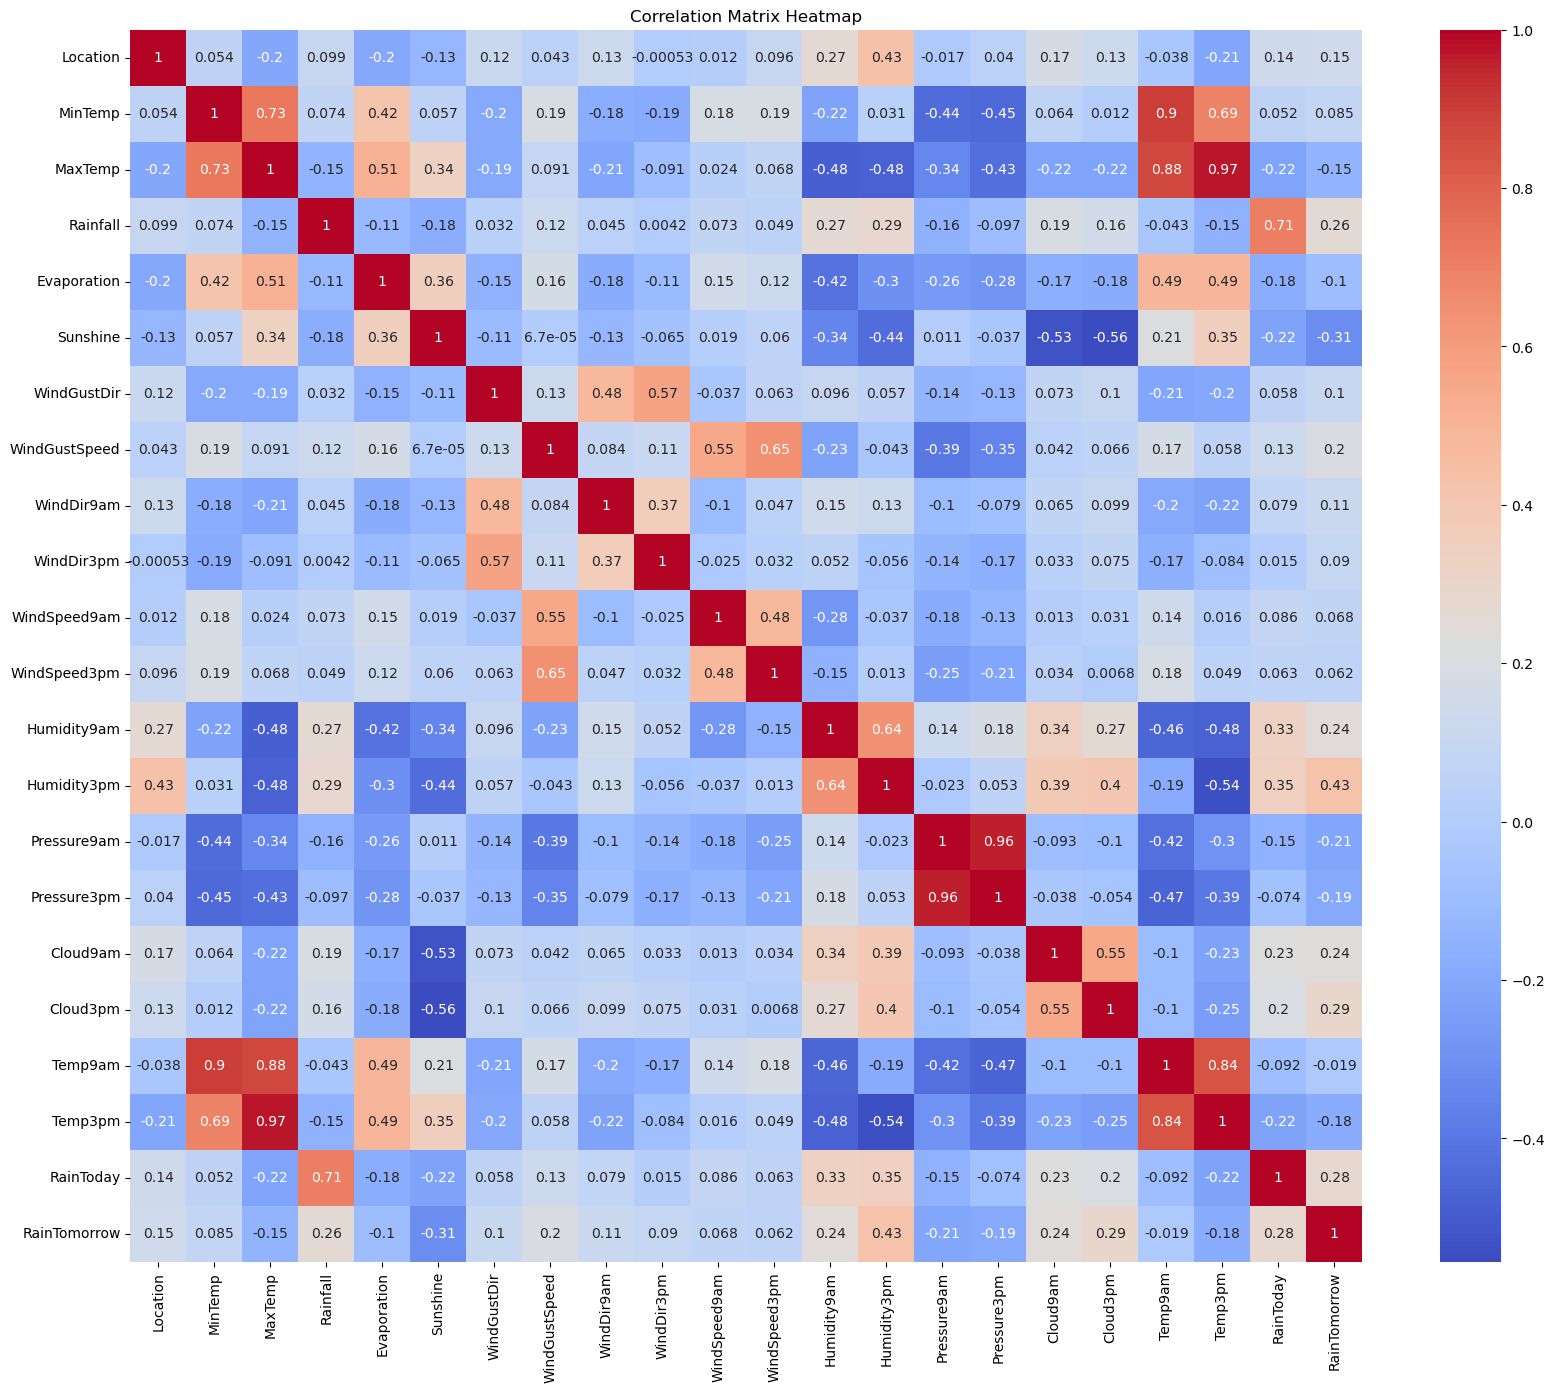

In [47]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(20,16)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [48]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Find columns with correlation greater than 0.9 or less than -0.9
highly_correlated_cols = set()  # Use a set to avoid duplicates
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            correlation = corr_matrix.loc[col1, col2]
            if abs(correlation) >= 0.9:
                pair = tuple(sorted([col1, col2]))  # Sort columns to avoid duplicates
                highly_correlated_cols.add((pair, correlation))

# Display highly correlated columns with their correlation values
for i, ((col1, col2), correlation) in enumerate(highly_correlated_cols, start=1):
    print(f"{i}) Columns: {col1} and {col2} are highly correlated with a correlation of {correlation}")
    print("-" * 100)

1) Columns: MaxTemp and Temp3pm are highly correlated with a correlation of 0.9696342809207625
----------------------------------------------------------------------------------------------------
2) Columns: Pressure3pm and Pressure9am are highly correlated with a correlation of 0.9592556792862011
----------------------------------------------------------------------------------------------------


**MaxTemp and Temp3pm are highly positively correlated.**

**Pressure3pm and Pressure9am are highly positively correlated.**

**I decide to drop 'Pressure3pm ','MaxTemp'  because they have lowest correlation with RainTomorrow.**

In [49]:
df.drop(['Pressure3pm', 'MaxTemp'], axis=1, inplace=True)

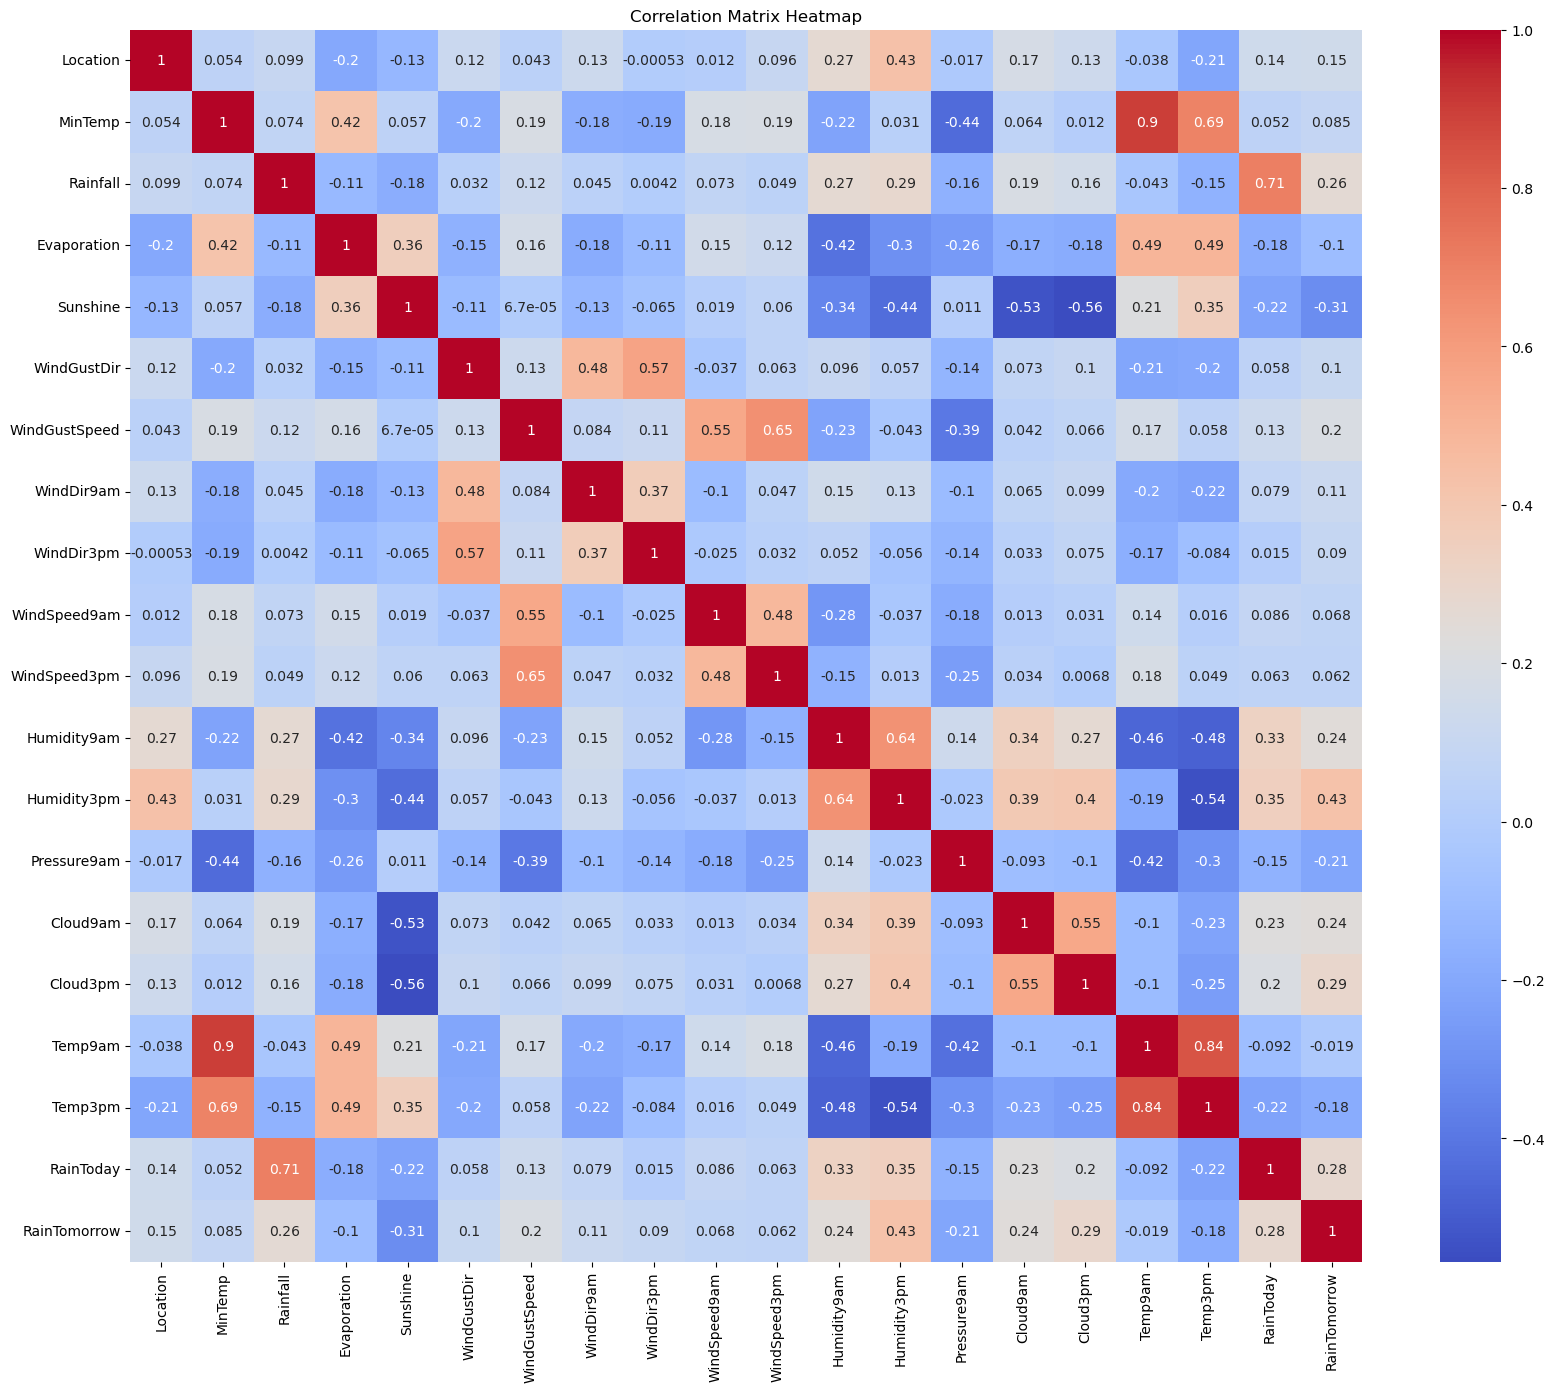

In [50]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(20,16)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [51]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Find columns with correlation greater than 0.9 or less than -0.9
highly_correlated_cols = set()  # Use a set to avoid duplicates
for col1 in corr_matrix.columns:
    for col2 in corr_matrix.columns:
        if col1 != col2:
            correlation = corr_matrix.loc[col1, col2]
            if abs(correlation) >= 0.9:
                pair = tuple(sorted([col1, col2]))  # Sort columns to avoid duplicates
                highly_correlated_cols.add((pair, correlation))

# Display highly correlated columns with their correlation values
for i, ((col1, col2), correlation) in enumerate(highly_correlated_cols, start=1):
    print(f"{i}) Columns: {col1} and {col2} are highly correlated with a correlation of {correlation}")
    print("-" * 100)

**Dropping the correlated variables successfully done.**

# Diving data into train and test set

In [52]:
x = df.drop("RainTomorrow",axis=1)
y = df['RainTomorrow']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [54]:
X_train.shape, y_train.shape

((93412, 19), (93412,))

In [55]:
X_test.shape, y_test.shape

((40035, 19), (40035,))

# Feature Scaling

In [56]:
#checking which variables needs scaling

for column in X_train.columns:
    unique_values = df[column].unique()
    
    print(f"Column: {column}")
    print("Unique Values:")
    print(unique_values)
    print()

Column: Location
Unique Values:
[0.19673247 0.18899859 0.127149   0.27175081 0.12995844 0.23752277
 0.24686347 0.29345133 0.19331496 0.17986385 0.24434673 0.23447772
 0.17235315 0.27147919 0.20940649 0.17367625 0.18100788 0.23242349
 0.2407794  0.17799462 0.1975     0.19924242 0.24592455 0.10529986
 0.14701987 0.34493671 0.23776467 0.3008073  0.21356374 0.28731478
 0.2367749  0.1463078  0.22468026 0.28694454 0.18634622 0.06709402
 0.28854856 0.28032157 0.17677707 0.17831325 0.19745628 0.15653965
 0.32125869 0.20085318 0.21830743 0.08316673 0.23899371 0.14517218
 0.07676204]

Column: MinTemp
Unique Values:
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7 13.1 15.9 12.6  9.8 14.1 13.5
 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3  9.6 10.5
 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6 19.3 18.8
 20.8 15.7 18.5 20.4 21.8 22.3 22.  24.4 21.5 21.7 23.5 28.3 18.4 12.4
 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8  7.6  8.3 11.
 20.9 16.4 10.   8.8  8.4  9.3 14

In [57]:
X_train.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
126203,0.156540,3.4,0.0,4.8,7.624853,0.170606,33.0,0.164738,0.179064,19.0,20.0,54.0,30.0,1017.6,4.437189,4.503167,12.8,18.2,0
38857,0.172353,2.0,0.0,0.6,10.100000,0.180551,13.0,0.201451,0.262861,7.0,7.0,88.0,51.0,1031.6,1.000000,4.000000,8.8,15.6,0
126075,0.156540,-0.8,0.0,4.8,7.624853,0.264066,26.0,0.291810,0.264561,11.0,9.0,69.0,31.0,1017.6,4.437189,4.503167,11.7,19.1,0
95124,0.146308,23.2,0.0,8.0,10.800000,0.180551,37.0,0.137456,0.180873,15.0,28.0,64.0,55.0,1016.8,4.000000,1.000000,28.4,30.9,0
8719,0.127149,14.3,0.2,2.4,7.624853,0.249593,57.0,0.291810,0.264561,20.0,28.0,97.0,67.0,1012.0,8.000000,1.000000,17.3,23.6,0


### Variables needs to be scale:-

**MinTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindDir9am, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Humidity3pm, Pressure9am, Cloud9am, Temp9am, Temp3pm**

### I decide to apply Standard Scaler because most of the data is normally distributed 

In [58]:
#Applying standard scaler on train and test set

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

variables_to_scale = ['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindDir9am', 'WindSpeed9am',
                      'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Temp9am',
                      'Temp3pm']

X_train[variables_to_scale] = scaler.fit_transform(X_train[variables_to_scale])

X_test[variables_to_scale] = scaler.transform(X_test[variables_to_scale])

X_train.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
126203,0.156540,-1.367149,-0.379414,-0.062871,-0.010669,0.170606,-0.495086,-0.993122,0.179064,0.686131,0.225674,-0.832123,-1.074066,-0.063815,0.010260,4.503167,-0.641837,-0.515264,0
38857,0.172353,-1.588699,-0.379414,-1.857032,0.906451,0.180551,-2.198613,-0.204097,0.262861,-0.784608,-1.365301,1.031802,-0.021139,2.115085,-1.505939,4.000000,-1.272655,-0.905896,0
126075,0.156540,-2.031799,-0.379414,-0.062871,-0.010669,0.264066,-1.091321,1.737860,0.264561,-0.294362,-1.120536,-0.009803,-1.023927,-0.063815,0.010260,4.503167,-0.815312,-0.380045,0
95124,0.146308,1.766202,-0.379414,1.304109,1.165823,0.180551,-0.154381,-1.579448,0.180873,0.195884,1.204736,-0.283910,0.179418,-0.188323,-0.182591,1.000000,1.818353,1.392826,0
8719,0.127149,0.357777,-0.327354,-1.088106,-0.010669,0.249593,1.549146,1.737860,0.264561,0.808692,1.204736,1.525194,0.781091,-0.935375,1.581873,1.000000,0.067833,0.296050,0


In [59]:
X_test.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
100858,0.286945,-0.449298,2.744226,-0.746361,-1.761376,0.264066,2.571262,1.737860,0.262861,1.789184,1.571884,0.154661,2.184993,-2.429477,0.699641,8.000000,-0.562985,-1.807356,1
77711,0.344937,-0.401823,2.535983,-0.062871,-0.010669,0.207917,0.782559,-0.662561,0.201001,0.195884,0.225674,1.360730,1.081927,-0.748612,1.140757,8.000000,-1.051869,-1.536918,1
131488,0.200853,-0.322698,-0.379414,-0.660924,0.424760,0.170606,-0.750615,0.695871,0.159162,-0.907170,-0.141474,0.373946,0.430115,2.255157,0.010260,4.503167,-0.736460,-0.650483,0
4311,0.188999,-1.193074,-0.327354,-0.062871,-0.010669,0.222924,-1.432026,1.053065,0.269750,-1.152293,-1.120536,1.689658,0.279697,0.932254,0.010260,4.503167,-1.540753,-0.620434,0
85787,0.213564,0.167877,-0.379414,-0.490052,0.906451,0.139538,-1.091321,0.473178,0.162642,-1.397416,-0.631005,-0.722480,-0.221697,-0.452904,-1.505939,1.000000,0.793274,0.491366,0


**Scaling successfully done.**

# Check for the class imbalance

In [60]:
df['RainTomorrow'].value_counts()

0    105310
1     28137
Name: RainTomorrow, dtype: int64

In [61]:
y_train.value_counts()

0    73736
1    19676
Name: RainTomorrow, dtype: int64

<AxesSubplot:>

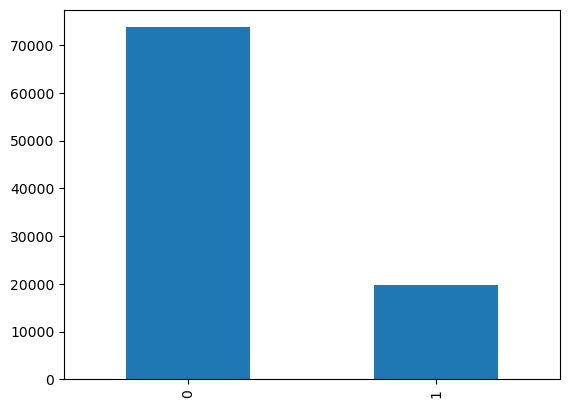

In [62]:
y_train.value_counts().plot(kind='bar')

In [63]:
#check the imbalance ratio

majority_count = 73736
minority_count = 19676

majority_ratio = majority_count / (minority_count + majority_count) * 100
minority_ratio = minority_count / (minority_count + majority_count) * 100

imbalance_ratio_str = f"{majority_ratio:.0f}:{minority_ratio:.0f}"
print(f"Imbalance Ratio: {imbalance_ratio_str}")

Imbalance Ratio: 79:21


**There is a major problem of class imabalace.**

# Handling Class Imbalance
**I have decided to apply only oversampling techniques because undersampling techniques lead to a loss of data. I will evaluate the results of these techniques on the random forest model and select the one that provides the best outcome.**

# SMOTE (Synthetic Minority Over-sampling Technique) 

In [64]:
#Applying Smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [65]:
#checking results of Smote

y_train_resampled.value_counts()

0    73736
1    73736
Name: RainTomorrow, dtype: int64

In [66]:
#check the performance on train data after applying Smote

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf_classifier.predict(X_train_resampled)

classification_rep = classification_report(y_train_resampled, y_train_pred)
accuracy = accuracy_score(y_train_resampled, y_train_pred)
balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
precision = precision_score(y_train_resampled, y_train_pred)
recall = recall_score(y_train_resampled, y_train_pred)
f1 = f1_score(y_train_resampled, y_train_pred)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     73736
           1       1.00      1.00      1.00     73736

    accuracy                           1.00    147472
   macro avg       1.00      1.00      1.00    147472
weighted avg       1.00      1.00      1.00    147472

Accuracy: 0.999830476293805
Balanced Accuracy: 0.999830476293805
Precision: 0.9996610675017964
Recall: 1.0
F1-score: 0.9998305050272209


In [67]:
#check the performance on test data after applying Smote

y_test_pred = rf_classifier.predict(X_test)

classification_rep = classification_report(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     31574
           1       0.65      0.58      0.62      8461

    accuracy                           0.85     40035
   macro avg       0.77      0.75      0.76     40035
weighted avg       0.84      0.85      0.84     40035

Accuracy: 0.8467590857999251
Balanced Accuracy: 0.7501435199043178
Precision: 0.6543259023354565
Recall: 0.582791632194776
F1-score: 0.6164905919859974


# ADASYN (Adaptive Synthetic Sampling)

In [68]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [69]:
#checking results of SmoteTomek

y_train_resampled.value_counts()

0    73736
1    72439
Name: RainTomorrow, dtype: int64

In [70]:
#check the performance on train data after applying ADASYN

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf_classifier.predict(X_train_resampled)

classification_rep = classification_report(y_train_resampled, y_train_pred)
accuracy = accuracy_score(y_train_resampled, y_train_pred)
balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
precision = precision_score(y_train_resampled, y_train_pred)
recall = recall_score(y_train_resampled, y_train_pred)
f1 = f1_score(y_train_resampled, y_train_pred)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     73736
           1       1.00      1.00      1.00     72439

    accuracy                           1.00    146175
   macro avg       1.00      1.00      1.00    146175
weighted avg       1.00      1.00      1.00    146175

Accuracy: 0.9998289721224559
Balanced Accuracy: 0.9998303548828263
Precision: 0.9996687919185228
Recall: 0.9999861952815472
F1-score: 0.9998274684094658


In [71]:
#check the performance on test data after applying ADASYN

y_test_pred = rf_classifier.predict(X_test)

classification_rep = classification_report(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Classification Report:")
print(classification_rep)
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     31574
           1       0.65      0.58      0.62      8461

    accuracy                           0.85     40035
   macro avg       0.77      0.75      0.76     40035
weighted avg       0.84      0.85      0.84     40035

Accuracy: 0.8465842387910578
Balanced Accuracy: 0.750465257758207
Precision: 0.653312177707259
Recall: 0.583973525587992
F1-score: 0.6166999500748878


### Both techniques provides almost similar results and problem of overfitting occurs by applying both techniques. So, I decided to go with smote because it is less sensitive to overfitting.

In [72]:
#Applying Smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [73]:
y_train_resampled.value_counts()

0    73736
1    73736
Name: RainTomorrow, dtype: int64

# Feature Selection using Random Forest Feature Importance Method

In [65]:
#building random forest model for feature selection using X_train_resampled and y_train_resampled

rf_classifier = RandomForestClassifier(n_jobs=-1, random_state=42)

rf_classifier.fit(X_train_resampled, y_train_resampled)

importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

feature_importance_df

,Feature,Importance
0,Humidity3pm,0.171745
1,Rainfall,0.108154
2,Sunshine,0.063466
3,WindGustSpeed,0.059916
4,Humidity9am,0.055099
5,Pressure3pm,0.054866
6,Pressure9am,0.047818
7,Cloud3pm,0.047094
8,Location,0.045712
9,WindDir3pm,0.043945


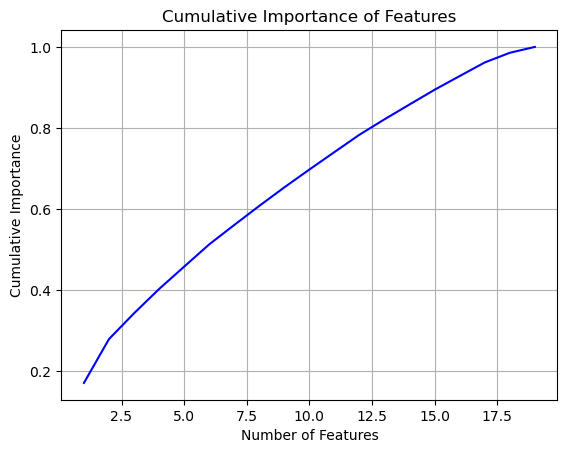

In [66]:
#check optimal number of features

sorted_indices = np.argsort(importances)[::-1]
cumulative_importance = np.cumsum(importances[sorted_indices])

plt.plot(range(1, len(importances) + 1), cumulative_importance, 'b-')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.grid(True)
plt.show()

In [67]:
#select optimal number of features

feature_importances = rf_classifier.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importances})

importance_df = importance_df.sort_values('Importance', ascending=False)

top_features = importance_df.head(17)['Feature'].tolist()

#Update X_train_resampled and X_test to include only the top features
X_train_resampled = X_train_resampled[top_features]
X_test = X_test[top_features]

#Verify the updated feature sets
print("Updated X_train_resampled shape:", X_train_resampled.shape)
print("Updated X_test shape:", X_test.shape)

Updated X_train_resampled shape: (147472, 17)
Updated X_test shape: (40035, 17)


In [68]:
#checking selected columns of X_train

top_features

['Humidity3pm',
 'Rainfall',
 'Sunshine',
 'WindGustSpeed',
 'Humidity9am',
 'Pressure3pm',
 'Pressure9am',
 'Cloud3pm',
 'Location',
 'WindDir3pm',
 'Temp3pm',
 'MinTemp',
 'WindGustDir',
 'WindSpeed3pm',
 'WindDir9am',
 'WindSpeed9am',
 'Cloud9am']

# Check multi-colinearity between variables to avoid model from overfitting.

In [69]:
#checking multicolinearity of X_train_resampled

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train_resampled.columns
vif["VIF"] = [variance_inflation_factor(X_train_resampled.values, i) for i in range(X_train_resampled.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
6,Pressure9am,16.987322
5,Pressure3pm,16.883810
7,Cloud3pm,7.919326
10,Temp3pm,7.312603
8,Location,6.871529
11,MinTemp,5.220069
0,Humidity3pm,4.571924
4,Humidity9am,2.382388
3,WindGustSpeed,2.366734
13,WindSpeed3pm,1.892261


**Some Variables has high VIF Value, greater than 5. So, I decide to drop those variables one by one.**

In [70]:
X_train_resampled.drop('Pressure3pm',axis=1,inplace=True)
X_test.drop('Pressure3pm',axis=1,inplace=True)

In [71]:
vif = pd.DataFrame()
vif["Variable"] = X_train_resampled.columns
vif["VIF"] = [variance_inflation_factor(X_train_resampled.values, i) for i in range(X_train_resampled.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
6,Cloud3pm,7.900923
7,Location,6.863026
9,Temp3pm,6.543932
10,MinTemp,5.005975
0,Humidity3pm,4.489795
4,Humidity9am,2.381904
3,WindGustSpeed,2.366325
12,WindSpeed3pm,1.890905
11,WindGustDir,1.870908
2,Sunshine,1.825232


In [72]:
X_train_resampled.drop('Cloud3pm',axis=1,inplace=True)
X_test.drop('Cloud3pm',axis=1,inplace=True)

In [73]:
vif = pd.DataFrame()
vif["Variable"] = X_train_resampled.columns
vif["VIF"] = [variance_inflation_factor(X_train_resampled.values, i) for i in range(X_train_resampled.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
8,Temp3pm,6.530499
9,MinTemp,4.984714
0,Humidity3pm,4.475876
4,Humidity9am,2.366267
3,WindGustSpeed,2.362248
11,WindSpeed3pm,1.876249
10,WindGustDir,1.866658
13,WindSpeed9am,1.781975
7,WindDir3pm,1.689668
2,Sunshine,1.686464


In [74]:
X_train_resampled.drop('Temp3pm',axis=1,inplace=True)
X_test.drop('Temp3pm',axis=1,inplace=True)

In [75]:
vif = pd.DataFrame()
vif["Variable"] = X_train_resampled.columns
vif["VIF"] = [variance_inflation_factor(X_train_resampled.values, i) for i in range(X_train_resampled.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
0,Humidity3pm,2.433615
4,Humidity9am,2.356910
3,WindGustSpeed,2.356461
10,WindSpeed3pm,1.875284
9,WindGustDir,1.858972
12,WindSpeed9am,1.712643
7,WindDir3pm,1.665820
2,Sunshine,1.665389
13,Cloud9am,1.619342
5,Pressure9am,1.546980


In [76]:
#verifying the selected features sets

print("Shape of X_train_resampled:", X_train_resampled.shape)
print()
print("Shape of X_test:", X_test.shape)
print('-'*120)
print("Columns of X_train_resampled:", X_train_resampled.columns)
print()
print("Columns of X_test:", X_test.columns)

Shape of X_train_resampled: (147472, 14)

Shape of X_test: (40035, 14)
------------------------------------------------------------------------------------------------------------------------
Columns of X_train_resampled: Index(['Humidity3pm', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
       'Pressure9am', 'Location', 'WindDir3pm', 'MinTemp', 'WindGustDir',
       'WindSpeed3pm', 'WindDir9am', 'WindSpeed9am', 'Cloud9am'],
      dtype='object')

Columns of X_test: Index(['Humidity3pm', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
       'Pressure9am', 'Location', 'WindDir3pm', 'MinTemp', 'WindGustDir',
       'WindSpeed3pm', 'WindDir9am', 'WindSpeed9am', 'Cloud9am'],
      dtype='object')


**Feature selection is successfully done. Therefore, these are the selected features.**

# Model Building

In [77]:
#importing algorithms and time

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
import time

In [78]:
#model building of multiple algorithms and check their evaulation metrics on training data along with their building time

algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GaussianNB(),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    XGBClassifier(n_jobs=-1, random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train_resampled, y_train_resampled)
    y_train_pred = algorithm.predict(X_train_resampled)

    accuracy = accuracy_score(y_train_resampled, y_train_pred)
    precision = precision_score(y_train_resampled, y_train_pred)
    recall = recall_score(y_train_resampled, y_train_pred)
    f1 = f1_score(y_train_resampled, y_train_pred)
    balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Balanced Accuracy'].append(balanced_accuracy)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Algorithm,Accuracy,Precision,Recall,F1-score,Balanced Accuracy,Building Time (s)
0,LogisticRegression,0.768512,0.775116,0.756510,0.765700,0.768512,10.208207
1,DecisionTreeClassifier,0.999810,0.999675,0.999946,0.999810,0.999810,2.354946
2,KNeighborsClassifier,0.901310,0.842441,0.987265,0.909122,0.901310,61.162399
3,GaussianNB,0.750441,0.769195,0.715607,0.741434,0.750441,0.313699
4,AdaBoostClassifier,0.808567,0.811922,0.803190,0.807532,0.808567,10.383030
5,GradientBoostingClassifier,0.856942,0.867114,0.843089,0.854933,0.856942,39.787803
6,RandomForestClassifier,0.999803,0.999675,0.999932,0.999803,0.999803,13.441890
7,XGBClassifier,0.921307,0.955339,0.883937,0.918252,0.921307,7.571732


In [79]:
#check evaulation metrics on test data

results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Balanced Accuracy': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

    results_test['Algorithm'].append(algorithm_name)
    results_test['Balanced Accuracy'].append(balanced_accuracy)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)
    

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Algorithm,Accuracy,Precision,Recall,F1-score,Balanced Accuracy
0,LogisticRegression,0.774972,0.479264,0.748493,0.584360,0.765280
1,DecisionTreeClassifier,0.769527,0.461251,0.538825,0.497029,0.685087
2,KNeighborsClassifier,0.743949,0.435943,0.719891,0.543039,0.735144
3,GaussianNB,0.766554,0.465486,0.705354,0.560850,0.744154
4,AdaBoostClassifier,0.785213,0.494076,0.680180,0.572381,0.746769
5,GradientBoostingClassifier,0.821406,0.569402,0.635622,0.600693,0.753407
6,RandomForestClassifier,0.846984,0.652475,0.590474,0.619928,0.753098
7,XGBClassifier,0.854452,0.717112,0.514124,0.598885,0.729888


**I have selected Logistic Regression as the final model because it does not overfit, unlike most other algorithms. On the test data, Logistic Regression has the highest recall compared to other algorithms, and its f1-score is also good. Additionally, the balanced accuracy of Logistic Regression is better than other models. Therefore, I will focus on further improving the performance of the Logistic Regression model.**

In [80]:
#build logistic regression model using statsmodels for deatiled statistics 

import statsmodels.api as sm

X_train_resampled = sm.add_constant(X_train_resampled)

logit_model = sm.GLM(y_train_resampled, X_train_resampled, family=sm.families.Binomial())

logit_result = logit_model.fit()

logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:               147472
Model:                            GLM   Df Residuals:                   147457
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70208.
Date:                Wed, 28 Jun 2023   Deviance:                   1.4042e+05
Time:                        00:28:42   Pearson chi2:                 1.45e+05
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3522
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.6163      0.029    -21.120      0.000      -0.674      -0.559
Humidity3pm       1.1203      0.011    106.653      0.000       1.100       1.141
Rainfall          0.1458      0.007     21.201      0.000       0.132       0.159
Sunshine         -0.3984      0.009    -46.726      0.000      -0.415      -0.382
WindGustSpeed     0.6649      0.010     64.926      0.000       0.645       0.685
Humidity9am       0.0642      0.011      6.113      0.000       0.044       0.085
Pressure9am      -0.3157      0.008    -38.261      0.000      -0.332      -0.300
Location          0.1142      0.131      0.870      0.384      -0.143       0.371
WindDir3pm        0.2279      0.009     26.458      0.000       0.211       0.245
MinTemp           0.1607      0.008     19.617      0.000       0.145       0.177
WindGustDir       0.0405      0.009      4.395      0.000       0.022       0.059
WindSpeed3pm     -0.2433      0.009    -26.348      0.000      -0.261      -0.225
WindDir9am        0.0567      0.008      6.930      0.000       0.041       0.073
WindSpeed9am     -0.1254      0.009    -14.256      0.000      -0.143      -0.108
Cloud9am          0.0685      0.009      7.982      0.000       0.052       0.085
=================================================================================
"""

 **P-Values of all the variables are good except 'Location' but we not drop 'Location' because it is important feature in analysis. Standard error of all variables are less.**

In [81]:
#evaulate performance of model on trainning data

y_pred_train = logit_result.predict(X_train_resampled) >= 0.5

classification_train = classification_report(y_train_resampled, y_pred_train)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
precision_train = precision_score(y_train_resampled, y_pred_train)
recall_train = recall_score(y_train_resampled, y_pred_train)
f1_score_train = f1_score(y_train_resampled, y_pred_train)
balanced_accuracy_train = balanced_accuracy_score(y_train_resampled, y_pred_train)

print("Classification Report - Training Data:")
print(classification_train)
print("Accuracy: {:.2f}".format(accuracy_train))
print("Precision: {:.2f}".format(precision_train))
print("Recall: {:.2f}".format(recall_train))
print("F1-score: {:.2f}".format(f1_score_train))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy_train))

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77     73736
           1       0.78      0.76      0.77     73736

    accuracy                           0.77    147472
   macro avg       0.77      0.77      0.77    147472
weighted avg       0.77      0.77      0.77    147472

Accuracy: 0.77
Precision: 0.78
Recall: 0.76
F1-score: 0.77
Balanced Accuracy: 0.77


In [82]:
#evaulate performance of model on test data

X_test = sm.add_constant(X_test)

y_pred_test = logit_result.predict(X_test) >= 0.5

classification_test = classification_report(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test, y_pred_test)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_pred_test)

print("Classification Report - Test Data:")
print(classification_test)
print("Accuracy: {:.2f}".format(accuracy_test))
print("Precision: {:.2f}".format(precision_test))
print("Recall: {:.2f}".format(recall_test))
print("F1-score: {:.2f}".format(f1_score_test))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy_test))

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.92      0.78      0.85     31574
           1       0.48      0.75      0.58      8461

    accuracy                           0.77     40035
   macro avg       0.70      0.77      0.71     40035
weighted avg       0.83      0.77      0.79     40035

Accuracy: 0.77
Precision: 0.48
Recall: 0.75
F1-score: 0.58
Balanced Accuracy: 0.77


**Recall is approx equal on both sets but f-1 score on test data is low. So, I decide to perform hyperparameter tunning to make a generalized model on the basis of f-1 score.**

# Hyperparameter Tunning

In [83]:
#importing GridSearchCV for hyperparameter tunning and define the parameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'], 
    'C': [0.01, 0.1, 1, 10, 100]}

**The C parameter in logistic regression controls the regularization of the model. A high value of C tells the model to fit the training data as closely as possible, even if it means overfitting. A low value of C tells the model to be more regularized, which means that it will not fit the training data as closely, but it will be less likely to overfit.In simple terms, the C parameter controls the trade-off between accuracy and generalization.**

In [84]:
#applying hyperparameter tunning

logit = LogisticRegression(solver='liblinear')

grid_search = GridSearchCV(logit, param_grid, cv=5, scoring='f1', n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='f1')

**Solver parameter is used to optimize the cost function of model and solve the mathematical equation of gradient descent algorithm in such a way that it minimizes the cost function in fast and better way.**

**liblinear: This solver is suitable for small to medium-sized datasets. It uses an efficient coordinate descent algorithm and supports both L1 and L2 regularization. It can handle binary and multiclass classification problems.**

In [85]:
grid_search.best_estimator_

LogisticRegression(C=0.1, solver='liblinear')

In [86]:
#build logistic regression using best_estimors

logit = LogisticRegression(C=0.1, solver='liblinear', random_state=42, n_jobs=-1)

logit.fit(X_train_resampled, y_train_resampled)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


LogisticRegression(C=0.1, n_jobs=-1, random_state=42, solver='liblinear')

In [87]:
#check the evaulation metrics on trainning and test data after hyperparameter tunnung

from sklearn.metrics import balanced_accuracy_score

# Make predictions on the train data
y_train_pred = logit.predict(X_train_resampled)

# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_f1 = f1_score(y_train_resampled, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)

# Make predictions on the test data
y_test_pred = logit.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# Create a dataframe to store the evaluation metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Balanced Accuracy'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1, train_balanced_accuracy],
    'Test': [test_accuracy, test_precision, test_recall, test_f1, test_balanced_accuracy]
})

metrics_df

,Metric,Train,Test
0,Accuracy,0.768505,0.774997
1,Precision,0.775098,0.479298
2,Recall,0.756523,0.748375
3,F1 Score,0.765698,0.584348
4,Balanced Accuracy,0.768505,0.765253


**There is no effect of hyperparameter tunning on logistic regression. Performance of model stills same. So, I decide to change the threshold for trail and test.**

# Finding Optimal Threshold

In [88]:
#creating a dataframe of probabilites, actual labels, predicted labels for genral check

probabilities = logit.predict_proba(X_train_resampled)

predicted_labels = logit.predict(X_train_resampled)

results = pd.DataFrame({'Probability': probabilities[:, 1],
                        'Actual_Label': y_train_resampled,
                        'Predicted_Label': predicted_labels})

results.sample(10)

,Probability,Actual_Label,Predicted_Label
65256,0.274651,0,0
126374,0.598142,1,1
85145,0.080050,0,0
69058,0.568943,0,1
77290,0.020960,0,0
115068,0.584775,1,1
76773,0.224629,0,0
47814,0.238944,0,0
71480,0.103775,0,0
27465,0.872651,0,1


**It seems that 0.5 is not the correct threshold becuase some observations are misclassified by this threshold.**

In [89]:
#check evaulation metrics for different thresholds

thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Creating an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterating over the probability thresholds
for threshold in thresholds:
    # Converting probabilities to predicted labels based on the threshold
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_train_resampled, predicted_labels)
    balanced_accuracy = balanced_accuracy_score(y_train_resampled, predicted_labels)
    precision = precision_score(y_train_resampled, predicted_labels, zero_division=1)
    recall = recall_score(y_train_resampled, predicted_labels, zero_division=1)
    f1 = f1_score(y_train_resampled, predicted_labels, zero_division=1)

    # Adding the metrics to the DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Balanced Accuracy': [balanced_accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)
metrics_df

,Probability,Accuracy,Balanced Accuracy,Precision,Recall,F1 Score
0,0.1,0.601687,0.601687,0.557210,0.990412,0.713181
1,0.2,0.687764,0.687764,0.622193,0.956073,0.753817
2,0.3,0.738533,0.738533,0.679125,0.904362,0.775725
3,0.4,0.762674,0.762674,0.729362,0.835291,0.778741
4,0.5,0.768505,0.768505,0.775098,0.756523,0.765698
5,0.6,0.758469,0.758469,0.815930,0.667530,0.734308
6,0.7,0.734099,0.734099,0.857255,0.561734,0.678722
7,0.8,0.691474,0.691474,0.897895,0.432082,0.583415
8,0.9,0.618402,0.618402,0.941983,0.252346,0.398058
9,1.0,0.500000,0.500000,1.000000,0.000000,0.000000


**According to the problem statement, the F1 Score is the most important metric to consider, followed by recall. For the threshold of 0.3, the F1 score is higher compared to other thresholds, and there is a good balance between precision and recall. Additionally, both accuracy and balanced accuracy are stable within this range. Therefore, I have decided to evaluate all thresholds between 0.2 and 0.4 to determine the optimal threshold point.**

In [90]:
#check evaulation metrics for thresholds between 0.2 to 0.4

thresholds = [0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40]

# Creating an empty DataFrame to store the evaluation metrics
metrics_df = pd.DataFrame(columns=['Probability', 'Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Iterating over the probability thresholds
for threshold in thresholds:
    # Converting probabilities to predicted labels based on the threshold
    predicted_labels = (probabilities[:, 1] >= threshold).astype(int)

    # Calculating evaluation metrics
    accuracy = accuracy_score(y_train_resampled, predicted_labels)
    balanced_accuracy = balanced_accuracy_score(y_train_resampled, predicted_labels)
    precision = precision_score(y_train_resampled, predicted_labels, zero_division=1)
    recall = recall_score(y_train_resampled, predicted_labels, zero_division=1)
    f1 = f1_score(y_train_resampled, predicted_labels, zero_division=1)

    # Adding the metrics to the DataFrame
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Probability': [threshold],
                                                      'Accuracy': [accuracy],
                                                      'Balanced Accuracy': [balanced_accuracy],
                                                      'Precision': [precision],
                                                      'Recall': [recall],
                                                      'F1 Score': [f1]})], ignore_index=True)
metrics_df

,Probability,Accuracy,Balanced Accuracy,Precision,Recall,F1 Score
0,0.21,0.694247,0.694247,0.628248,0.951557,0.756820
1,0.22,0.700038,0.700038,0.633884,0.947095,0.759464
2,0.23,0.706066,0.706066,0.639996,0.942036,0.762184
3,0.24,0.711328,0.711328,0.645670,0.936693,0.764420
4,0.25,0.716984,0.716984,0.651817,0.931607,0.766993
5,0.26,0.721920,0.721920,0.657491,0.926467,0.769142
6,0.27,0.725684,0.725684,0.662373,0.920636,0.770437
7,0.28,0.730267,0.730267,0.668162,0.914926,0.772312
8,0.29,0.734797,0.734797,0.673916,0.909827,0.774301
9,0.30,0.738533,0.738533,0.679125,0.904362,0.775725


In [91]:
max_recall_row = metrics_df.loc[metrics_df['F1 Score'].idxmax()]
max_recall_row

Probability          0.350000
Accuracy             0.753913
Balanced Accuracy    0.753913
Precision            0.705001
Recall               0.873210
F1 Score             0.780141
Name: 14, dtype: float64

**Among all threhold values F-1 Score is maximum for 0.35**. 

# Chek the Trade-Off Between Accuracy, Sensitivity, Specitivity, F-1 Score and Probabilities (Thresholds)

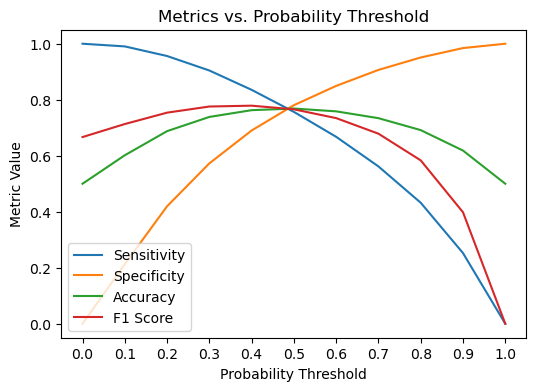

In [92]:
from sklearn.metrics import confusion_matrix

# Calculate predicted probabilities for the train data
train_probabilities = logit.predict_proba(X_train_resampled)[:, 1]

# Apply different thresholds to obtain binary predictions for train data
thresholds = np.arange(0, 1.1, 0.1)
sensitivity = []
specificity = []
accuracy = []
f1_scores = []

for threshold in thresholds:
    train_predictions = (train_probabilities >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_train_resampled, train_predictions).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    f1_scores.append(f1_score(y_train_resampled, train_predictions))

# Plot the sensitivity, specificity, accuracy, and F1 score against probability thresholds
plt.figure(figsize=(6,4))
plt.plot(thresholds, sensitivity, label='Sensitivity')
plt.plot(thresholds, specificity, label='Specificity')
plt.plot(thresholds, accuracy, label='Accuracy')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Probability Threshold')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.ylabel('Metric Value')
plt.title('Metrics vs. Probability Threshold')
plt.legend(loc='lower left')
plt.show()


**0.49 is the threshold value where the trade-off between Accuracy, Sensitivity, Specitivity and F-1 Score is stable.**

# Evaulate model on 0.35 as threshold

In [93]:
#checking accuracy, precison, recall, f1 score

# Make predictions on training data
y_train_pred_probs = logit.predict_proba(X_train_resampled)[:, 1]
y_train_pred = np.where(y_train_pred_probs >= 0.35, 1, 0)

# Calculate evaluation metrics for training data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_f1_score = f1_score(y_train_resampled, y_train_pred)

# Make predictions on test data
y_test_pred_probs = logit.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_pred_probs >= 0.35, 1, 0)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

# Create a dataframe to store the results
metrics_data = {
    'Metric': ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Training Data': [train_accuracy, train_balanced_accuracy, train_precision, train_recall, train_f1_score],
    'Test Data': [test_accuracy, test_balanced_accuracy, test_precision, test_recall, test_f1_score]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Metric,Training Data,Test Data
0,Accuracy,0.753913,0.684976
1,Balanced Accuracy,0.753913,0.750358
2,Precision,0.705001,0.389395
3,Recall,0.873210,0.863610
4,F1 Score,0.780141,0.536766


## Confusion Matrix

In [94]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.35
train_predictions = (logit.predict_proba(X_train_resampled)[:, 1] >= 0.35).astype(int)
train_confusion_matrix = confusion_matrix(y_train_resampled, train_predictions)

# Calculate predictions for the test set using a threshold of 0.35
test_predictions = (logit.predict_proba(X_test)[:, 1] >= 0.35).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train_resampled)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),31.730769,50.246035
True Negative (%),18.269231,28.619958
False Positive (%),6.339509,2.882478
False Negative (%),43.660491,18.251530


## ROC-AUC Curve

**The ROC-AUC curve is typically plotted using the predictions and true labels on the test data. This allows us to evaluate the performance of the model on unseen data and assess its ability to generalize.**

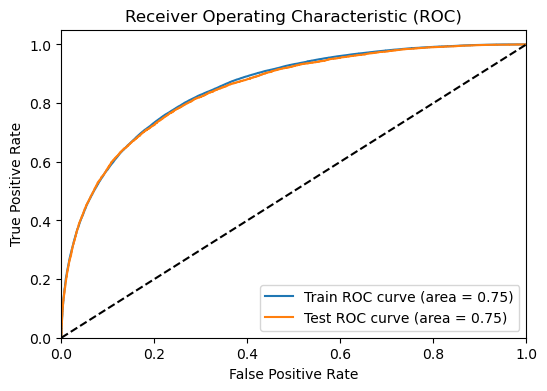

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = logit.predict_proba(X_train_resampled)[:, 1]

# Apply the threshold of 0.35 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.35).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train_resampled, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = logit.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.35 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.35).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Evaulate model on 0.49 as threshold on test data

In [96]:
#checking accuracy, precison, recall, f1 score

# Make predictions on training data
y_train_pred = logit.predict(X_train_resampled)

# Calculate evaluation metrics for training data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train_resampled, y_train_pred)
train_precision = precision_score(y_train_resampled, y_train_pred)
train_recall = recall_score(y_train_resampled, y_train_pred)
train_f1_score = f1_score(y_train_resampled, y_train_pred)

# Make predictions on test data
y_test_pred = logit.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred)

# Create a dataframe to store the results
metrics_data = {
    'Metric': ['Accuracy', 'Balanced Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Training Data': [train_accuracy, train_balanced_accuracy, train_precision, train_recall, train_f1_score],
    'Test Data': [test_accuracy, test_balanced_accuracy, test_precision, test_recall, test_f1_score]
}
metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Metric,Training Data,Test Data
0,Accuracy,0.768505,0.774997
1,Balanced Accuracy,0.768505,0.765253
2,Precision,0.775098,0.479298
3,Recall,0.756523,0.748375
4,F1 Score,0.765698,0.584348


In [97]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.35
train_predictions = (logit.predict_proba(X_train_resampled)[:, 1] >= 0.49).astype(int)
train_confusion_matrix = confusion_matrix(y_train_resampled, train_predictions)

# Calculate predictions for the test set using a threshold of 0.35
test_predictions = (logit.predict_proba(X_test)[:, 1] >= 0.49).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train_resampled)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),38.597836,61.024104
True Negative (%),11.402164,17.841888
False Positive (%),11.754774,5.130511
False Negative (%),38.245226,16.003497


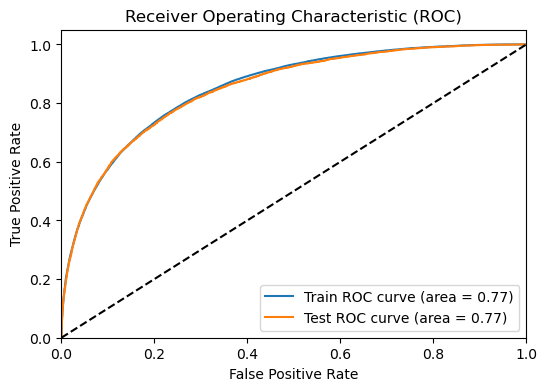

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = logit.predict_proba(X_train_resampled)[:, 1]

# Apply the threshold of 0.35 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.49).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train_resampled, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = logit.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.35 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.49).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Cross Validation

In [99]:
#cross validation of F-1 Score 

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logit, X_train_resampled, y_train_resampled, cv=5, scoring='f1',n_jobs=-1)

print("Cross-Validation Scores (F1):", scores)
print()
print("Mean F1 Score:", scores.mean())

Cross-Validation Scores (F1): [0.7667446  0.76509883 0.7666804  0.76051213 0.76843981]

Mean F1 Score: 0.7654951553226613


In [100]:
#cross validation of Recall

scores = cross_val_score(logit, X_train_resampled, y_train_resampled, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.75608598 0.75718742 0.75737438 0.75120363 0.76015461]

Mean Recall Score: 0.756401204483417


# Checking for the coefficients

In [101]:
# Get the feature names
feature_names = X_train_resampled.columns

# Get the coefficients and their magnitudes
coefficients = logit.coef_.flatten()
coefficients_abs = np.abs(coefficients)

# Create a dataframe to store the coefficients, magnitudes, and corresponding feature names
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Magnitude': coefficients_abs
})

# Sort the coefficients by magnitude in descending order
coefficients_df = coefficients_df.sort_values(by='Magnitude', ascending=False)
coefficients_df

,Feature,Coefficient,Magnitude
1,Humidity3pm,1.119548,1.119548
4,WindGustSpeed,0.664005,0.664005
3,Sunshine,-0.398269,0.398269
6,Pressure9am,-0.315543,0.315543
0,const,-0.305411,0.305411
11,WindSpeed3pm,-0.242641,0.242641
8,WindDir3pm,0.227509,0.227509
9,MinTemp,0.160660,0.160660
2,Rainfall,0.145797,0.145797
13,WindSpeed9am,-0.124911,0.124911


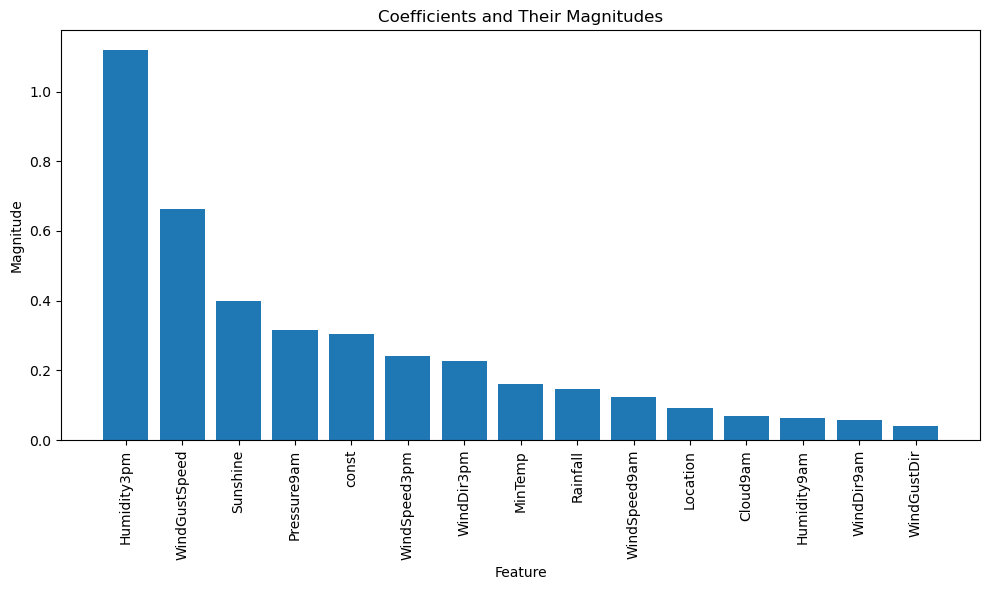

In [102]:
# Plot the coefficients with their magnitudes
plt.figure(figsize=(10, 6))
plt.bar(coefficients_df['Feature'], coefficients_df['Magnitude'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Magnitude')
plt.title('Coefficients and Their Magnitudes')
plt.tight_layout()
plt.show()

# Save the model to a file

In [103]:
import joblib

model = logit

joblib.dump(model, 'Rain_Classifier.pkl')

['Rain_Classifier.pkl']

# Report

**I tried out several classification algorithms and noticed that most of them were overfitting the data. After thorough evaluation, I selected Logistic Regression as the final model because it did not exhibit overfitting issues like the other algorithms. Logistic Regression performed well on the test data, showing the highest recall among the other models and a good f1-score. Furthermore, its balanced accuracy was better than other models. Based on these findings, I decided to focus on further improving the performance of the Logistic Regression model.**

**While analyzing the logistic regression results, I observed that the P-value of the 'location' variable was slightly high. However, I chose not to drop it because this feature is important for the analysis. Additionally, I performed hyperparameter tuning to optimize the model, but it did not have a significant impact on its performance.**

**Next, I examined the optimal threshold point for classification and found that using a threshold of 0.35 maximized the f1-score compared to other threshold values. However, I also considered the trade-off between accuracy, sensitivity, specificity, and f1-score against the predicted probabilities. After analyzing the results, I determined that a threshold of 0.49 provided a stable performance across all these metrics, making it the optimal threshold.**

**To further assess the model, I evaluated its performance using both the 0.35 and 0.49 thresholds. Additionally, I performed cross-validation, which led to improvements in both the f1-score and recall of the model. Choosing the threshold ultimately depends on the stakeholders involved and can be adjusted throughout the development process.**

## Model Summary

**0.50 as threshold**

| Metric   |	Train |	Test  |
|----------|----------|--------|
| Accuracy | 0.768505 |	0.774997|
|Precision	|0.775098|	0.479298|
|	Recall	|0.756523	|0.748375|
|	F1 Score|	0.765698|	0.584348|
|	Balanced Accuracy|	0.768505|	0.765253|

**0.35 as threshold**

|Metric|	Training Data|	Test Data|
|----------|------------|------------|
|	Accuracy|	0.753913|	0.684976|
|	Balanced Accuracy	|0.753913	|0.750358|
|	Precision|	0.705001	|0.389395|
|Recall	|0.873210|	0.863610|
|	F1 Score|	0.780141|	0.536766|
|ROC-AUC|0.75|0.75|
|True Positive (%)|	31.730769	|50.246035|
|True Negative (%)|	18.269231|	28.619958|
|False Positive (%)|	6.339509|	2.882478|
|False Negative (%)|	43.660491	|18.251530|


**0.49 as threshold**

|Metric|	Training Data|	Test Data|
|-----|----------------|-------------|
|	Accuracy	|0.768505|	0.774997|
|	Balanced Accuracy|	0.768505	|0.765253|
|	Precision|	0.775098|	0.479298|
|	Recall	|0.756523|	0.748375|
|	F1 Score|	0.765698|	0.584348|
|ROC-AUC| 0.77|0.77|
|True Positive (%)|	38.597836	|61.024104|
|True Negative (%)|	11.402164|	17.841888|
|False Positive (%)|	11.754774	|5.130511|
|False Negative (%)|	38.245226|	16.003497|

**Validation Data**

|F1 Score|Recall|
|------|-------|
|0.7654|0.7563|
    
### Top predictors

**Below are the top 10 variables that have the most significant impact on whether it will rain tomorrow or not.**

|Feature|	Coefficient|
|--------|-------------|
|	Humidity3pm|	1.119548|	
|	WindGustSpeed|	0.664005|	
|	Sunshine|	-0.398269|	
|	Pressure9am|	-0.315543|		
|	WindSpeed3pm|	-0.242641|	
|	WindDir3pm|	0.227509	|
|	MinTemp|	0.160660	|
|Rainfall|	0.145797	|
|	WindSpeed9am|	0.124911|	
| Location|	0.090725|	

**Variables with positive coefficient shows Positive correlation with 'RainTomorow' and negative coefficient shows inverse correlation with 'RainTomorow'.**

**Eg:- If the Humidity is high then probability of rain happening tommorrow is high and if the sunshine is high then probability of rain happening tommorrow is low.**